<h1> Data Exploration

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scorecardpy as sc

import warnings
import pprint
import textwrap
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [53]:
df = pd.read_csv('ApplicationData.csv')

# Save a copy of the filtered data just in case
df.orig = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(41), object(16)
memory usage: 281.5+ MB


In [54]:
# Check missing values
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0                COMMONAREA_MODE    69.872297
1                 COMMONAREA_AVG    69.872297
2                COMMONAREA_MEDI    69.872297
3       NONLIVINGAPARTMENTS_MEDI    69.432963
4       NONLIVINGAPARTMENTS_MODE    69.432963
5        NONLIVINGAPARTMENTS_AVG    69.432963
6             FONDKAPREMONT_MODE    68.386172
7          LIVINGAPARTMENTS_MEDI    68.354953
8           LIVINGAPARTMENTS_AVG    68.354953
9          LIVINGAPARTMENTS_MODE    68.354953
10                 FLOORSMIN_AVG    67.848630
11                FLOORSMIN_MODE    67.848630
12                FLOORSMIN_MEDI    67.848630
13              YEARS_BUILD_MEDI    66.497784
14              YEARS_BUILD_MODE    66.497784
15               YEARS_BUILD_AVG    66.497784
16                   OWN_CAR_AGE    65.990810
17                 LANDAREA_MEDI    59.376738
18                  LANDAREA_AVG    59.376738
19                 LANDAREA_MODE    59.376738
20             BASEMENTAREA_MEDI    58.515956
21              BASEMENTAREA_AVG    58.515956
22             BASEMENTAREA_MODE    58.515956
23                  EXT_SOURCE_1    56.381073
24             NONLIVINGAREA_AVG    55.179164
25            NONLIVINGAREA_MODE    55.179164
26            NONLIVINGAREA_MEDI    55.179164
27                ELEVATORS_MEDI    53.295980
28                ELEVATORS_MODE    53.295980
29                 ELEVATORS_AVG    53.295980
30            WALLSMATERIAL_MODE    50.840783
31               APARTMENTS_MEDI    50.749729
32                APARTMENTS_AVG    50.749729
33               APARTMENTS_MODE    50.749729
34                ENTRANCES_MEDI    50.348768
35                 ENTRANCES_AVG    50.348768
36                ENTRANCES_MODE    50.348768
37                LIVINGAREA_AVG    50.193326
38               LIVINGAREA_MODE    50.193326
39               LIVINGAREA_MEDI    50.193326
40                HOUSETYPE_MODE    50.176091
41                FLOORSMAX_MODE    49.760822
42                FLOORSMAX_MEDI    49.760822
43                 FLOORSMAX_AVG    49.760822
44  YEARS_BEGINEXPLUATATION_MODE    48.781019
45   YEARS_BEGINEXPLUATATION_AVG    48.781019
46  YEARS_BEGINEXPLUATATION_MEDI    48.781019
47                TOTALAREA_MODE    48.268517
48           EMERGENCYSTATE_MODE    47.398304
49               OCCUPATION_TYPE    31.345545
50     AMT_REQ_CREDIT_BUREAU_MON    13.501631
51     AMT_REQ_CREDIT_BUREAU_QRT    13.501631
52    AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
53     AMT_REQ_CREDIT_BUREAU_DAY    13.501631
54    AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
55    AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
56               NAME_TYPE_SUITE     0.420148
57      DEF_30_CNT_SOCIAL_CIRCLE     0.332021
58      DEF_60_CNT_SOCIAL_CIRCLE     0.332021
59      OBS_60_CNT_SOCIAL_CIRCLE     0.332021
60      OBS_30_CNT_SOCIAL_CIRCLE     0.332021
61               AMT_GOODS_PRICE     0.090403
62                   AMT_ANNUITY     0.003902
63               CNT_FAM_MEMBERS     0.000650
64        DAYS_LAST_PHONE_CHANGE     0.000325

<h1> Data Preparation


In [55]:
df = df[
    (df['FLAG_OWN_REALTY'] == 'Y') &
    (df['DAYS_BIRTH'] < -7670) &
    (df['DAYS_BIRTH'] > -23741)
].copy()

Data Selection Via Domain Knowledge

In [56]:
drop_cols = [
    # Identifiers
    'CODE_GENDER',

    # Redundant contact details
    'FLAG_MOBIL', 'FLAG_PHONE', 

    # Redundant address mismatch flags
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'LIVE_CITY_NOT_WORK_CITY',
    'NAME_TYPE_SUITE','OWN_CAR_AGE',

    # Application timing info
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',

    # Low info / redundant / noisy house features
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI','LIVINGAREA_MODE','YEARS_BUILD_AVG',
    'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'LIVINGAREA_MEDI ',

    # Credit bureau enquiry columns to drop
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT',

    # Weak social circle features
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')


# Combine FLAG_DOCUMENT_* into NUM_DOCS_PROVIDED
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
df['NUM_DOCS_PROVIDED'] = df[doc_cols].sum(axis=1)
df.drop(columns=doc_cols, inplace=True)

# STEP 3 (Optional): Combine bureau enquiries
# bureau_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# df['TOTAL_BUREAU_ENQUIRIES'] = df[bureau_cols].sum(axis=1)
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_CREDIT                   207300 non-null  float64
 8   AMT_ANNUITY                  207297 non-null  float64
 9   AMT_GOODS_PRICE              207077 non-null  float64
 10  NAME_INCOME_TYPE             207300 non-null  object 
 11  NAME_EDUCATION_TYPE          207300 non-null  object 
 12  NAME_FAMILY_STATUS           207300 non-null  object 
 13  NAME

Data Extraction

In [57]:
# Create RATIO_LIFE_EMPLOYED
df['RATIO_LIFE_EMPLOYED'] = np.where(
    df['DAYS_EMPLOYED'].notna() & df['DAYS_BIRTH'].notna(),
    df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'],
    np.nan
)

# Drop the original columns
df.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH'], inplace=True)

# Create LOAN_TO_VALUE
df['LOAN_TO_VALUE'] = np.where(
    df['AMT_CREDIT'].notna() & df['AMT_GOODS_PRICE'].notna(),
    df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'],
    np.nan
)

# Drop the original columns
df.drop(columns=['AMT_CREDIT', 'AMT_GOODS_PRICE'], inplace=True)

# Check the new columns
df[['RATIO_LIFE_EMPLOYED', 'LOAN_TO_VALUE']].describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_ANNUITY                  207297 non-null  float64
 8   NAME_INCOME_TYPE             207300 non-null  object 
 9   NAME_EDUCATION_TYPE          207300 non-null  object 
 10  NAME_FAMILY_STATUS           207300 non-null  object 
 11  NAME_HOUSING_TYPE            207300 non-null  object 
 12  REGION_POPULATION_RELATIVE   207300 non-null  float64
 13  DAYS

<h3> Trying to Improve classifier performance by :<br>Finding Variables with High Correlation To Each Other <h3>

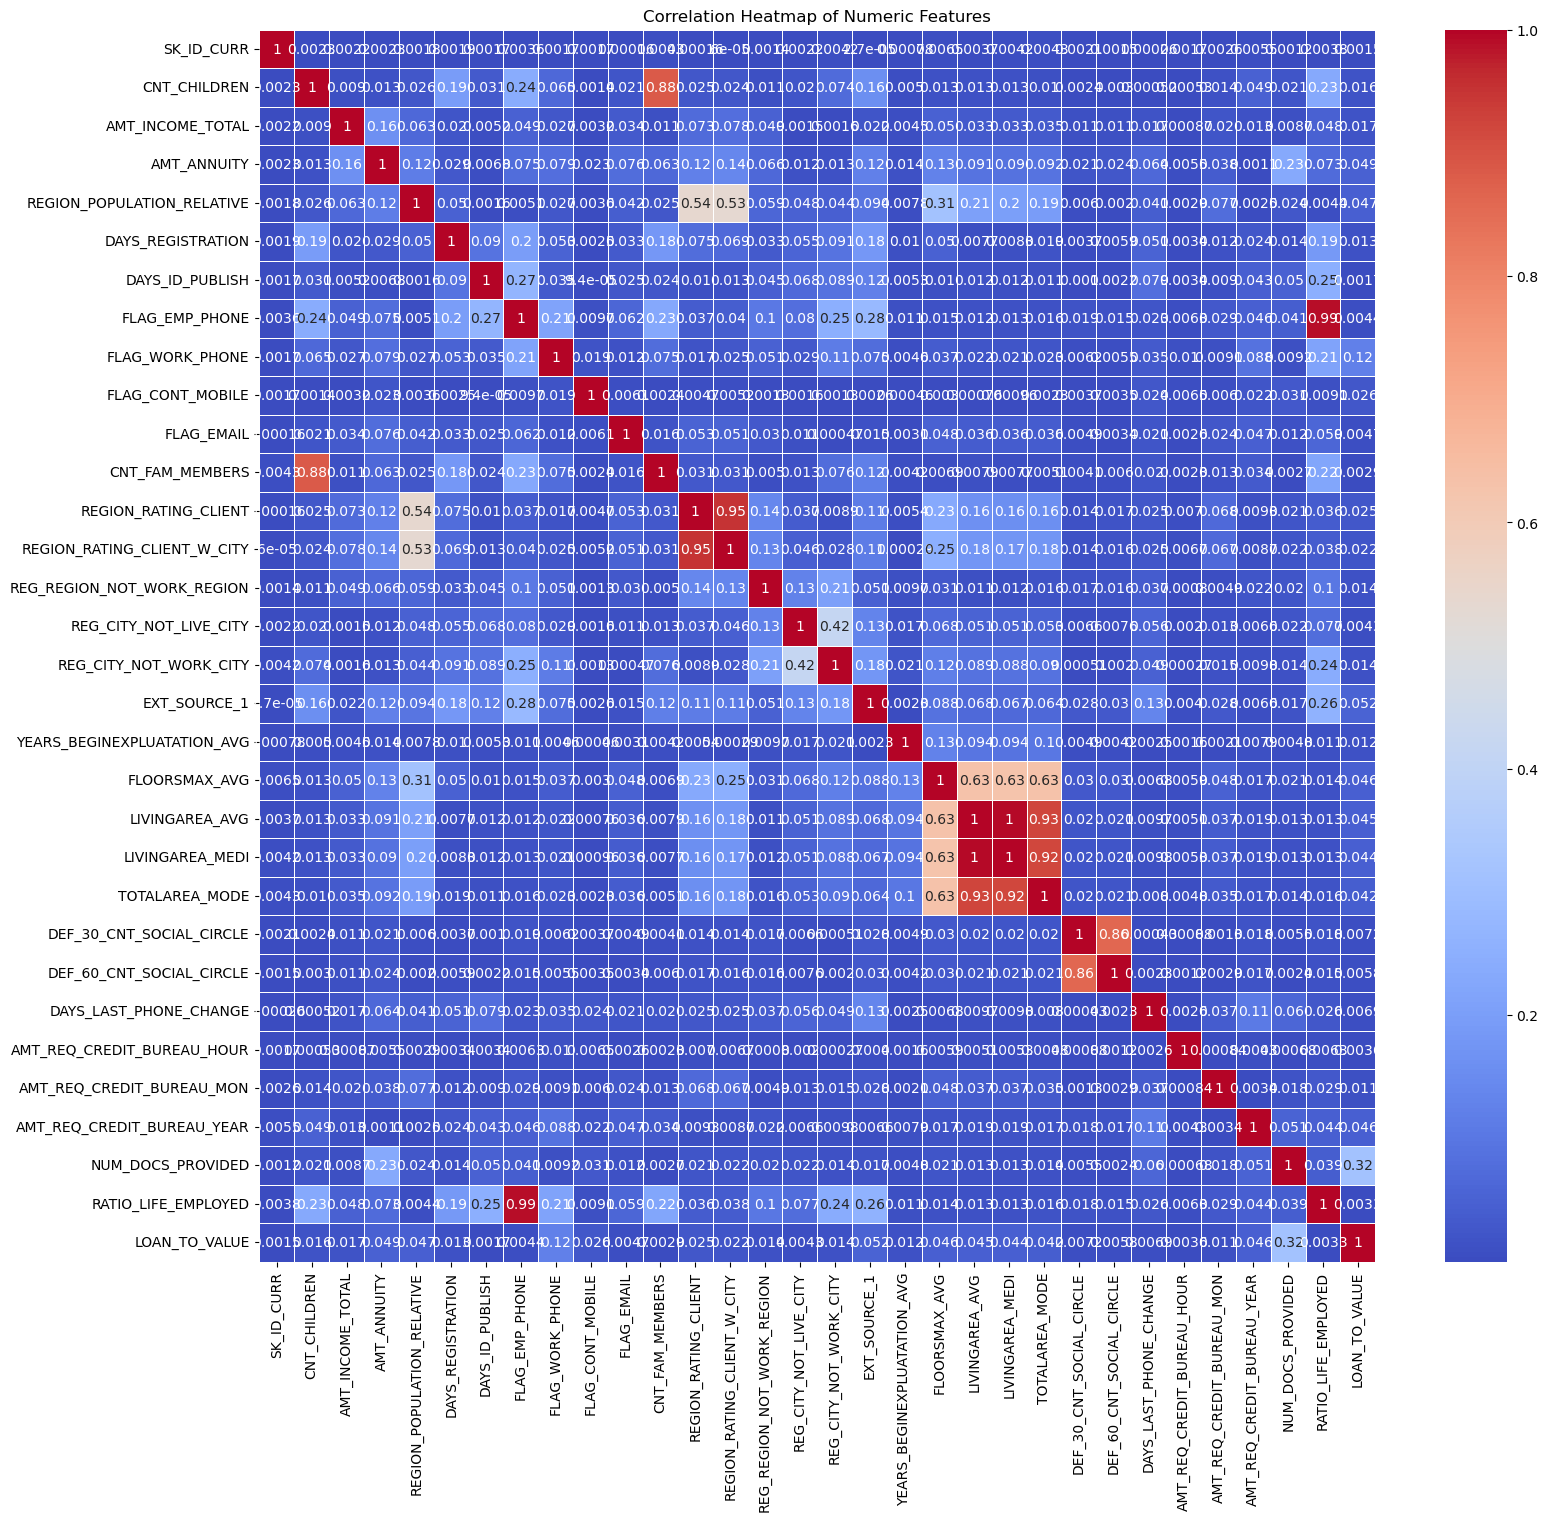

In [58]:
# Get numeric columns excluding target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("TARGET")

numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr().abs()


# Set figure size
plt.figure(figsize=(18, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Using Domain Logic To Decide Which Variables To Drop :<br>
REG_CITY_NOT_WORK_CITY vs REG_CITY_NOT_LIVE_CITY <br>
Both reflect potential instability in the client's residence or work life. Slighlty overlapping but not the same. <br><br>

FLOORSMAX_AVG vs LIVINGAREA_AVG <br>
Correlation: 0.63  Keep both — they capture different aspects of the property<br><br>

AMT_GOODS_PRICE vs AMT_ANNUITY <br>
Even though highly correlated, One is the size of the loan. The other is payment burden<br><br>

Verdict - We will not drop any of the 4 numerical data with higher than average correlation. 

In [59]:

df.info()
df.to_csv("cleaned_application_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   207300 non-null  int64  
 1   TARGET                       207300 non-null  int64  
 2   NAME_CONTRACT_TYPE           207300 non-null  object 
 3   FLAG_OWN_CAR                 207300 non-null  object 
 4   FLAG_OWN_REALTY              207300 non-null  object 
 5   CNT_CHILDREN                 207300 non-null  int64  
 6   AMT_INCOME_TOTAL             207300 non-null  float64
 7   AMT_ANNUITY                  207297 non-null  float64
 8   NAME_INCOME_TYPE             207300 non-null  object 
 9   NAME_EDUCATION_TYPE          207300 non-null  object 
 10  NAME_FAMILY_STATUS           207300 non-null  object 
 11  NAME_HOUSING_TYPE            207300 non-null  object 
 12  REGION_POPULATION_RELATIVE   207300 non-null  float64
 13  DAYS

<h2> Flattening of Bureau Data

In [60]:
df = pd.read_csv("BureauData.csv")
# Using domain logic to drop columns not useful for aggregation
df = df.drop(columns=[
    "SK_ID_BUREAU",        # Only identifies individual credit records
    "CREDIT_CURRENCY",     # 99.9% = currency 1
    "DAYS_CREDIT_UPDATE"   # Too redundant with DAYS_CREDIT / END_DATE
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   CREDIT_ACTIVE           object 
 2   DAYS_CREDIT             int64  
 3   CREDIT_DAY_OVERDUE      int64  
 4   DAYS_CREDIT_ENDDATE     float64
 5   DAYS_ENDDATE_FACT       float64
 6   AMT_CREDIT_MAX_OVERDUE  float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_LIMIT    float64
 11  AMT_CREDIT_SUM_OVERDUE  float64
 12  CREDIT_TYPE             object 
 13  AMT_ANNUITY             float64
dtypes: float64(8), int64(4), object(2)
memory usage: 183.3+ MB


In [61]:
# Step 2: Aggregation
agg_map = {
    "DAYS_CREDIT": "min",
    "DAYS_CREDIT_ENDDATE": "mean",
    "CREDIT_DAY_OVERDUE": "max",
    "AMT_CREDIT_MAX_OVERDUE": "max",
    "AMT_CREDIT_SUM_OVERDUE": "sum",
    "AMT_CREDIT_SUM": ["sum", "mean"],
    "AMT_CREDIT_SUM_DEBT": ["sum", "mean"],
    "CNT_CREDIT_PROLONG": "sum"
}

bureau_agg = df.groupby("SK_ID_CURR").agg(agg_map)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns]
bureau_agg = bureau_agg.reset_index()

In [62]:
# Step 3: Pivot CREDIT_ACTIVE counts
status_counts = (
    df.pivot_table(index="SK_ID_CURR", columns="CREDIT_ACTIVE", values="AMT_CREDIT_SUM", aggfunc="count", fill_value=0)
    .reset_index()
)
status_counts.columns = ["SK_ID_CURR"] + [f"CREDIT_ACTIVE_{c}" for c in status_counts.columns[1:]]


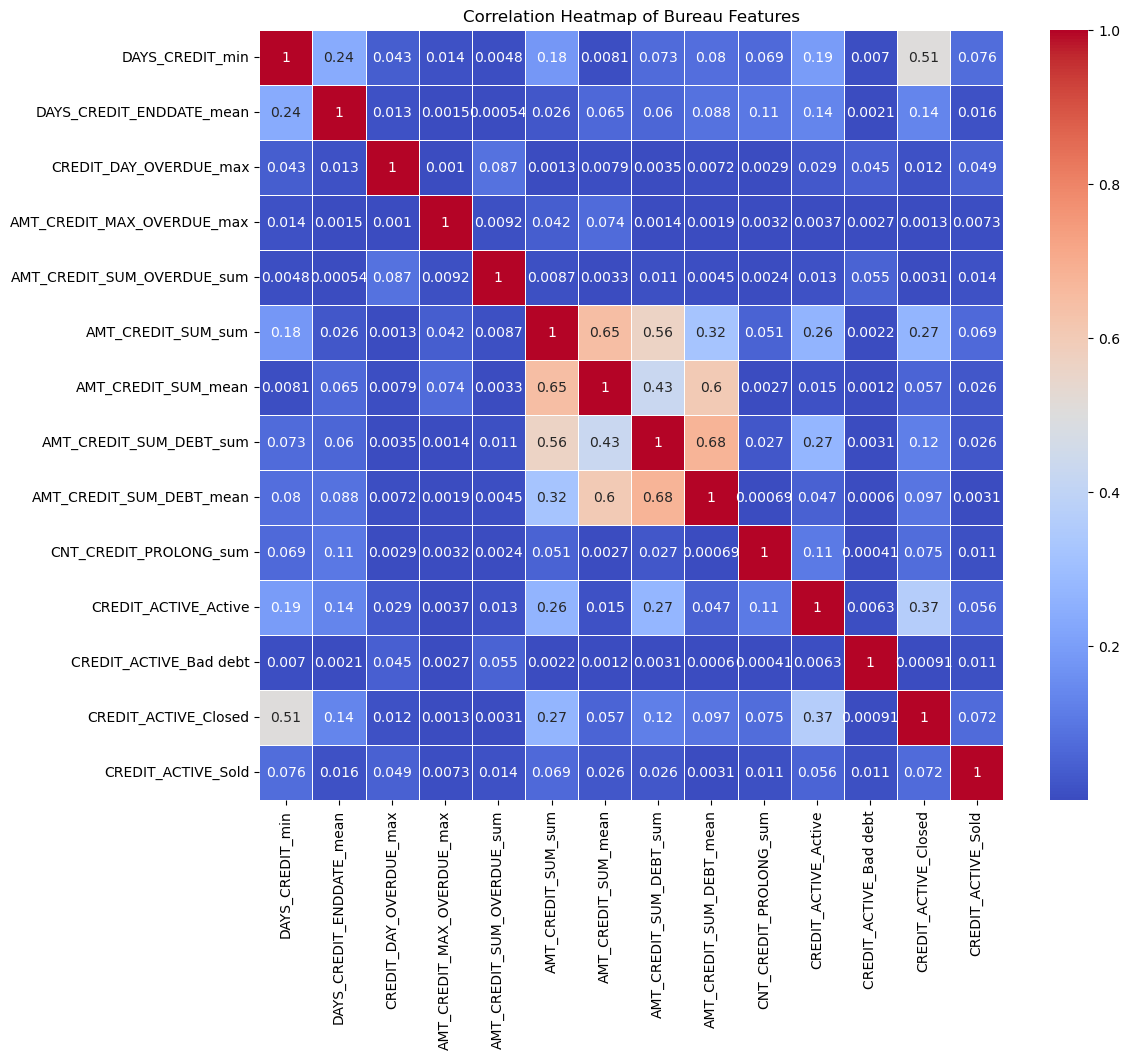

In [63]:
# Step 4: Merge everything
bureau_flat = bureau_agg.merge(status_counts, on="SK_ID_CURR", how="left")

# Step 5: Plot correlation heatmap
corr_matrix = bureau_flat.drop(columns="SK_ID_CURR").select_dtypes(include='number').corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Bureau Features")
plt.show()

In [64]:
bureau_flat.to_csv("flattened_bureau_data.csv", index=False)

<h3> Merging Bureau Data and Application Data

In [65]:
#Load Cleaned Application Data
application_data = pd.read_csv("cleaned_application_data.csv")
application_data.head()

#Load Cleaned & Flattened Bureau Data
bureau_flat = pd.read_csv("flattened_bureau_data.csv")
bureau_flat.head()

#Merge Datasets on SK_ID_CURR
merged_data = application_data.merge(bureau_flat, on="SK_ID_CURR", how="left")
merged_data.drop(columns="SK_ID_CURR",inplace=True)
#Save the Final Merged Data to CSV
merged_data.to_csv("after_merge.csv", index=False)

#Preview Merged Data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

<h1> Grouping And Screening

<h3> Fine Classing

In [206]:
df = pd.read_csv('after_merge.csv')
df_orig = df.copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [207]:
#convert to categorical
cols_to_object = [
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'FLAG_EMP_PHONE',         # binary (0/1)
    'FLAG_WORK_PHONE',        # binary
    'FLAG_CONT_MOBILE',       # binary
    'FLAG_EMAIL',             # binary
    'REG_REGION_NOT_WORK_REGION',  # binary
    'REG_CITY_NOT_LIVE_CITY',      # binary
    'REG_CITY_NOT_WORK_CITY',      # binary
]
for col in cols_to_object:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('object')

for col in df.columns:
    if col not in cols_to_object:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [208]:
def calculate_iv_all(df, target_col='TARGET', bins=20):
    iv_summary = []
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Remove target column from both
    numerical_cols = [col for col in numerical_cols if col != target_col]
    categorical_cols = [col for col in categorical_cols if col != target_col]

    # --- Numerical Features ---
    for col in numerical_cols:
        temp_df = df[[col, target_col]].copy()

        # Bin using qcut and fill missing with 'Missing'
        try:
            temp_df['Bin_Range'] = pd.qcut(temp_df[col], q=bins, duplicates='drop')
        except ValueError:
            print(f"Skipping {col} (not enough unique values to bin)")
            continue

        temp_df['Bin_Range'] = temp_df['Bin_Range'].astype(object).fillna('Missing')

        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # --- Categorical Features ---
    for col in categorical_cols:
        temp_df = df[[col, target_col]].copy()
        temp_df['Bin_Range'] = temp_df[col].astype(str).fillna('Missing')
        
        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # Return as sorted DataFrame
    iv_df = pd.DataFrame(iv_summary).sort_values(by='IV', ascending=False)
    return iv_df

# --- Helper Function ---
def _calculate_iv(temp_df, target_col):
    grouped = temp_df.groupby('Bin_Range')
    total_events = temp_df[target_col].sum()
    total_non_events = len(temp_df) - total_events

    iv_table = grouped.agg({target_col: ['count', 'sum']}).reset_index()
    iv_table.columns = ['Bin_Range', 'Count', 'Events']
    iv_table['Non_Events'] = iv_table['Count'] - iv_table['Events']
    iv_table['%_Events'] = iv_table['Events'] / total_events
    iv_table['%_Non_Events'] = iv_table['Non_Events'] / total_non_events

    # Avoid division by 0
    iv_table['WOE'] = np.log((iv_table['%_Non_Events'] + 1e-6) / (iv_table['%_Events'] + 1e-6))
    iv_table['IV'] = (iv_table['%_Non_Events'] - iv_table['%_Events']) * iv_table['WOE']

    return iv_table['IV'].sum()

In [209]:
train, test = sc.split_df(df, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

(145110, 55)
(62190, 55)


In [210]:
train_iv_df = calculate_iv_all(train, target_col='TARGET', bins=20)
print(train_iv_df)

                       Variable            IV
9                  EXT_SOURCE_1  1.629145e-01
23                LOAN_TO_VALUE  9.461927e-02
22          RATIO_LIFE_EMPLOYED  8.726264e-02
24              DAYS_CREDIT_min  8.425047e-02
25     DAYS_CREDIT_ENDDATE_mean  7.930151e-02
49              OCCUPATION_TYPE  7.625227e-02
53            ORGANIZATION_TYPE  7.500725e-02
17       DAYS_LAST_PHONE_CHANGE  5.208366e-02
32     AMT_CREDIT_SUM_DEBT_mean  5.193154e-02
41             NAME_INCOME_TYPE  5.173677e-02
34         CREDIT_ACTIVE_Active  5.112539e-02
42          NAME_EDUCATION_TYPE  5.037716e-02
31      AMT_CREDIT_SUM_DEBT_sum  4.652146e-02
3    REGION_POPULATION_RELATIVE  4.514693e-02
5               DAYS_ID_PUBLISH  4.342992e-02
11                FLOORSMAX_AVG  4.001797e-02
14               TOTALAREA_MODE  3.812600e-02
12               LIVINGAREA_AVG  3.669374e-02
13              LIVINGAREA_MEDI  3.654049e-02
36         CREDIT_ACTIVE_Closed  3.620935e-02
2                   AMT_ANNUITY  3

In [ ]:
# iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
# print(iv_df)

<h3> Characteristic Screening

In [211]:
important_vars = [
    'EXT_SOURCE_1',                   # 0.156003
    'LOAN_TO_VALUE',                  # 0.091847
    'RATIO_LIFE_EMPLOYED',           # 0.088309
    'OCCUPATION_TYPE',               # 0.080222
    'DAYS_CREDIT_min',               # 0.078569 (most recent credit record)
    'DAYS_CREDIT_ENDDATE_mean',      # 0.075526 (avg number of days until loan end)
    'ORGANIZATION_TYPE',             # 0.068933
    'AMT_CREDIT_SUM_DEBT_mean',      # 0.054111 (avg debt per credit)
    'CREDIT_ACTIVE_Active',          # 0.053558 (count of active credits)
    'NAME_INCOME_TYPE',              # 0.050930
    'DAYS_LAST_PHONE_CHANGE',        # 0.048573
    'NAME_EDUCATION_TYPE',           # 0.048123
    'AMT_CREDIT_SUM_DEBT_sum',       # 0.047867 (total debt from bureau)
    'REGION_POPULATION_RELATIVE',    # 0.040241
    'FLOORSMAX_AVG',                 # 0.039137
    'DAYS_ID_PUBLISH',               # 0.037855
    'TARGET'                         # target label for supervised learning
]

train.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(train.info())
test.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 145110 entries, 0 to 207299
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      145110 non-null  int64  
 1   NAME_INCOME_TYPE            145110 non-null  object 
 2   NAME_EDUCATION_TYPE         145110 non-null  object 
 3   REGION_POPULATION_RELATIVE  145110 non-null  float64
 4   DAYS_ID_PUBLISH             145110 non-null  int64  
 5   OCCUPATION_TYPE             145110 non-null  object 
 6   ORGANIZATION_TYPE           145110 non-null  object 
 7   EXT_SOURCE_1                62444 non-null   float64
 8   FLOORSMAX_AVG               73800 non-null   float64
 9   DAYS_LAST_PHONE_CHANGE      145110 non-null  float64
 10  RATIO_LIFE_EMPLOYED         145110 non-null  float64
 11  LOAN_TO_VALUE               144951 non-null  float64
 12  DAYS_CREDIT_min             123772 non-null  float64
 13  DAYS_CREDIT_ENDDATE

In [212]:
train.to_csv("after_fine_classing_train.csv", index=False)
test.to_csv("after_fine_classing_test.csv", index=False)

<h3>Functions for Coarse Classing

In [213]:
def woe_iv(data, variable_name):
    working_data = data.copy()
    working_data['Bin_Range'] = working_data['Bin_Range'].astype(str).fillna('Missing')

    variable_data = pd.DataFrame()
    variable_data['Bin_Range'] = working_data.groupby('Bin_Range', as_index=False).count()['Bin_Range']
    variable_data['Count'] = working_data.groupby('Bin_Range')['TARGET'].count().values
    variable_data['Events'] = working_data.groupby('Bin_Range')['TARGET'].sum().values
    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    variable_data['%_of_Events'] = variable_data['Events'] / sum(variable_data['Events'])
    variable_data['%_of_Non_Events'] = variable_data['Non_Events'] / sum(variable_data['Non_Events'])

    variable_data['WOE'] = np.log((variable_data['%_of_Non_Events'] + 1e-6) / (variable_data['%_of_Events'] + 1e-6))
    variable_data['IV'] = (variable_data['%_of_Non_Events'] - variable_data['%_of_Events']) * variable_data['WOE']

    IV = variable_data['IV'].sum()
    return IV, variable_data


In [214]:
def woe_iv_plot(data, variable_name):
    IV, variable_data = woe_iv(data, variable_name)
    print(f"IV for {variable_name} with {variable_data.shape[0]} bins: {round(IV, 4)}")

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    variable_data = variable_data.copy()
    variable_data['Bin_Range'] = variable_data['Bin_Range'].astype(str)

    # Plot WOE line
    sns.lineplot(data=variable_data, x='Bin_Range', y='WOE', marker='o', ax=ax1, label='WOE', color='black')
    for i, row in variable_data.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    ax1.set_ylabel("WOE", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Plot stacked bar for good and bad percentages
    ax2 = ax1.twinx()
    width = 0.5
    r = np.arange(len(variable_data))
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], width=width, bottom=variable_data['%_of_Events'], label='% Bad', color='red', alpha=0.6)
    ax2.set_ylabel("Proportion of Records", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45)

    ax2.legend(loc='upper right')
    plt.title(f"WOE Plot for {variable_name}")
    plt.tight_layout()
    plt.show()

In [215]:
def plot_numeric_woe(df, variable, bins):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    woe_bin_data = df[[variable, "TARGET"]].copy()
    woe_bin_data['Bin_Range'] = pd.qcut(woe_bin_data[variable], q=bins, duplicates='drop')
    woe_bin_data['Bin_Range'] = woe_bin_data['Bin_Range'].astype(str).fillna('Missing')
    woe_iv_plot(woe_bin_data, variable)

def plot_numeric_woe_manual(df, variable, bin_edges):
    df = df[[variable, 'TARGET']].copy()
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    df['Bin_Range'] = pd.cut(df[variable], bins=bin_edges, include_lowest=True)
    df['Bin_Range'] = df['Bin_Range'].astype(str).fillna('Missing')

    IV, variable_data = woe_iv(df, variable)
    variable_data = variable_data.sort_values(by='WOE').reset_index(drop=True)

    print(f"\nIV for {variable} with {variable_data.shape[0]} bins: {round(IV, 4)}")
    print("WOE values per Bin_Range:")
    for _, row in variable_data.iterrows():
        print(f"  {row['Bin_Range']}: WOE = {row['WOE']:.6f}")
    
    woe_iv_plot(df, variable)


In [216]:
def woe_iv_plot_categorical(df, variable_name, target_name='TARGET'):
    """
    Plots WOE values for a categorical variable, with % good and bad bars stacked.
    Also displays IV on the plot.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    IV, variable_data = woe_iv(working_data, variable_name)
    variable_data = variable_data.sort_values(by='WOE', ascending=True).reset_index(drop=True)

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))

    r = range(len(variable_data))
    width = 0.5
    ax2 = ax1.twinx()
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], bottom=variable_data['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45, ha='right', fontsize=10)
    ax2.tick_params(axis='x', labelsize=10)

    sns.lineplot(x=r, y=variable_data['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    ax1.set_ylabel("WOE", fontsize=12)

    # Display IV in plot title
    plt.title(f"WOE Plot for {variable_name}\nInformation Value (IV) = {IV:.6f}", fontsize=14)
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


def woe_iv_plot_categorical_manual(df, variable_name, cut_indices, target_name='TARGET'):
    """
    Manually groups categories based on cut indices, plots WOE, and prints IV before/after and WOE values per grouped bin.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    # Step 1: Original WOE and IV (before binning)
    IV_before, variable_data_before = woe_iv(working_data, variable_name)
    sorted_categories = variable_data_before.sort_values('WOE')['Bin_Range'].tolist()

    # Step 2: Group categories based on cut_indices
    grouped_mapping = {}
    group_labels = []
    raw_group_labels = []  # For printing purposes

    for i in range(len(cut_indices) - 1):
        group = sorted_categories[cut_indices[i]:cut_indices[i + 1]]
        raw_label = ', '.join(group)
        label_wrapped = textwrap.fill(raw_label, width=30)
        group_labels.append(label_wrapped)
        raw_group_labels.append(raw_label)
        for cat in group:
            grouped_mapping[cat] = label_wrapped

    # Step 3: Apply grouped binning
    working_data['Bin_Range'] = working_data['Bin_Range'].map(grouped_mapping).fillna(working_data['Bin_Range'])

    # Step 4: Recalculate WOE and IV (after binning)
    IV_after, variable_data_grouped = woe_iv(working_data, variable_name)
    variable_data_grouped = variable_data_grouped.sort_values(by='WOE').reset_index(drop=True)

    # Step 5: Plot
    fig_width = max(22, len(variable_data_grouped['Bin_Range']) * 0.9)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    r = range(len(variable_data_grouped))
    width = 0.5

    ax2 = ax1.twinx()
    ax2.bar(r, variable_data_grouped['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data_grouped['%_of_Non_Events'], bottom=variable_data_grouped['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data_grouped['Bin_Range'], rotation=30, ha='right', fontsize=9)

    sns.lineplot(x=r, y=variable_data_grouped['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    for i, row in variable_data_grouped.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.6f}", ha='center', va='bottom', fontsize=9, color='black')

    ax1.set_ylabel("WOE", fontsize=12)
    plt.title(
        f"WOE Plot (Grouped) for {variable_name}\nIV Before Binning = {IV_before:.6f} | IV After Binning = {IV_after:.6f}",
        fontsize=13
    )
    fig.legend(loc='upper right')
    plt.tight_layout(pad=2)
    plt.show()

    # Step 6: Print summary
    print(f"\nInformation Value (IV) Before Binning: {IV_before:.6f}")
    print(f"Information Value (IV) After Binning:  {IV_after:.6f}")
    print("\nWOE for each grouped bin:")
    for i, row in variable_data_grouped.iterrows():
        print(f"Group {i + 1}:")
        print(f"  Categories: {raw_group_labels[i]}")
        print(f"  WOE: {row['WOE']:.6f}\n")

<h2> Coarse Classing

In [239]:
train_df = pd.read_csv('after_fine_classing_train.csv')
test_df = pd.read_csv('after_fine_classing_test.csv')
df = train_df.copy()
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')
df.info()
df1 = test_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      145110 non-null  int64  
 1   NAME_INCOME_TYPE            145110 non-null  object 
 2   NAME_EDUCATION_TYPE         145110 non-null  object 
 3   REGION_POPULATION_RELATIVE  145110 non-null  float64
 4   DAYS_ID_PUBLISH             145110 non-null  int64  
 5   OCCUPATION_TYPE             100272 non-null  object 
 6   ORGANIZATION_TYPE           145110 non-null  object 
 7   EXT_SOURCE_1                62444 non-null   float64
 8   FLOORSMAX_AVG               73800 non-null   float64
 9   DAYS_LAST_PHONE_CHANGE      145110 non-null  float64
 10  RATIO_LIFE_EMPLOYED         145110 non-null  float64
 11  LOAN_TO_VALUE               144951 non-null  float64
 12  DAYS_CREDIT_min             123772 non-null  float64
 13  DAYS_CREDIT_EN

IV for EXT_SOURCE_1 with 21 bins: 0.1629


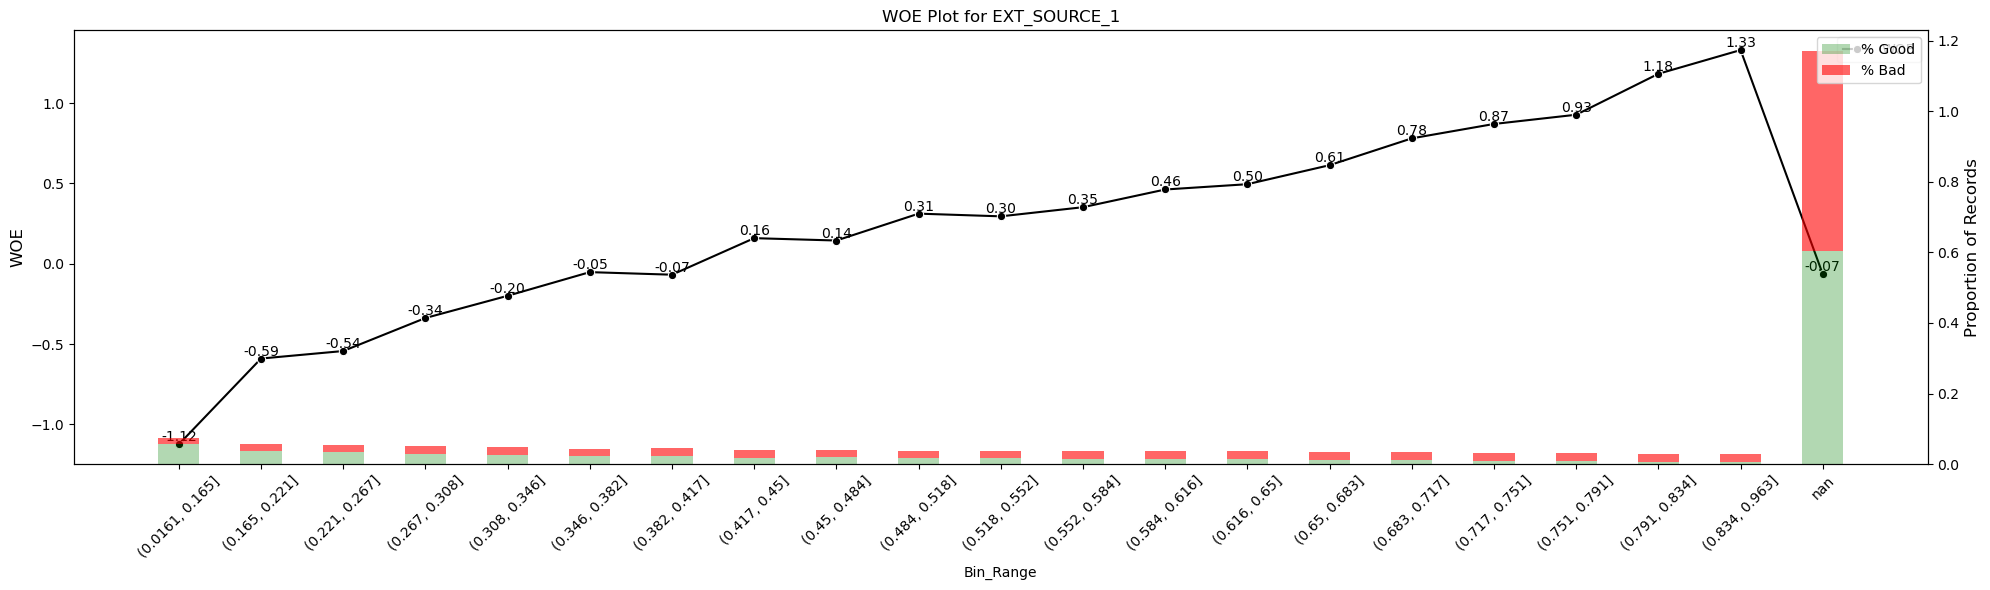


IV for EXT_SOURCE_1 with 6 bins: 0.1529
WOE values per Bin_Range:
  (-0.001, 0.2]: WOE = -0.971003
  (0.2, 0.4]: WOE = -0.292831
  nan: WOE = -0.065028
  (0.4, 0.6]: WOE = 0.231614
  (0.6, 0.8]: WOE = 0.713261
  (0.8, 1.0]: WOE = 1.330819
IV for EXT_SOURCE_1 with 6 bins: 0.1529


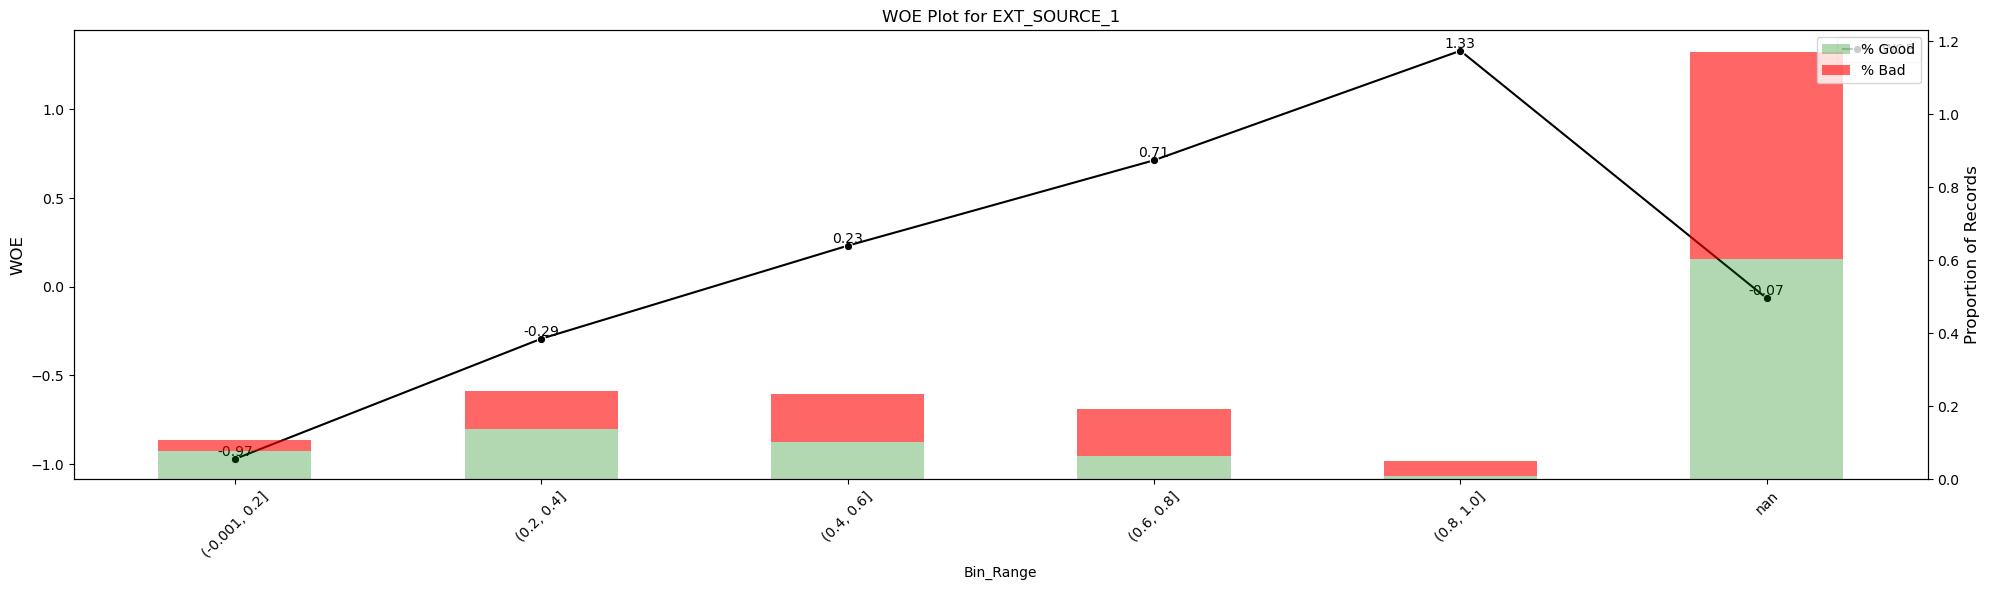

In [218]:
plot_numeric_woe(df, 'EXT_SOURCE_1', 20)
plot_numeric_woe_manual(df, 'EXT_SOURCE_1', [0,0.2, 0.4, 0.6,0.8,1])

IV for LOAN_TO_VALUE with 15 bins: 0.0946


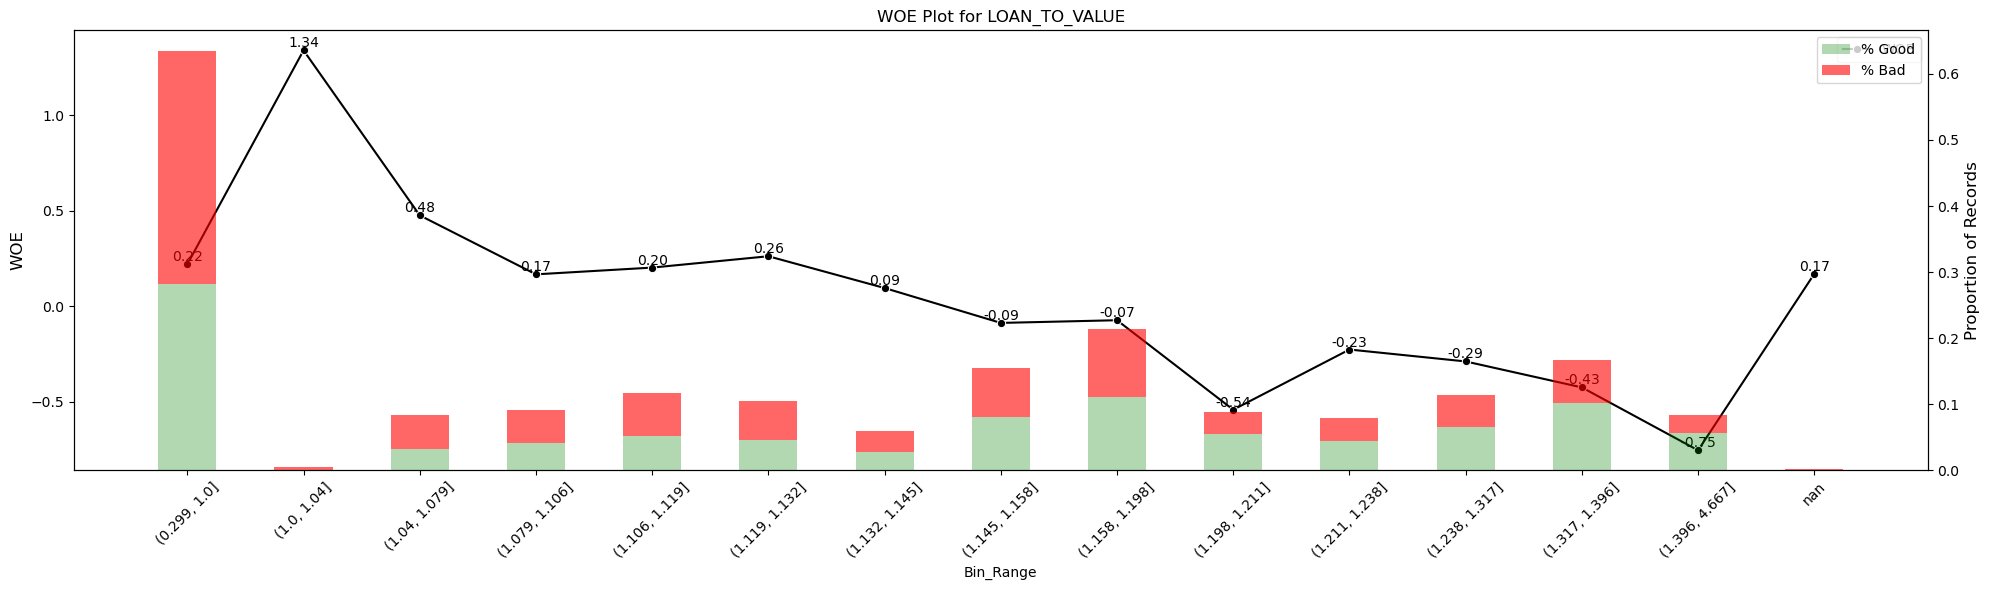


IV for LOAN_TO_VALUE with 5 bins: 0.0714
WOE values per Bin_Range:
  (1.3, 6.0]: WOE = -0.525442
  (1.2, 1.3]: WOE = -0.350164
  (1.0, 1.2]: WOE = 0.106749
  nan: WOE = 0.169211
  (0.149, 1.0]: WOE = 0.219101
IV for LOAN_TO_VALUE with 5 bins: 0.0714


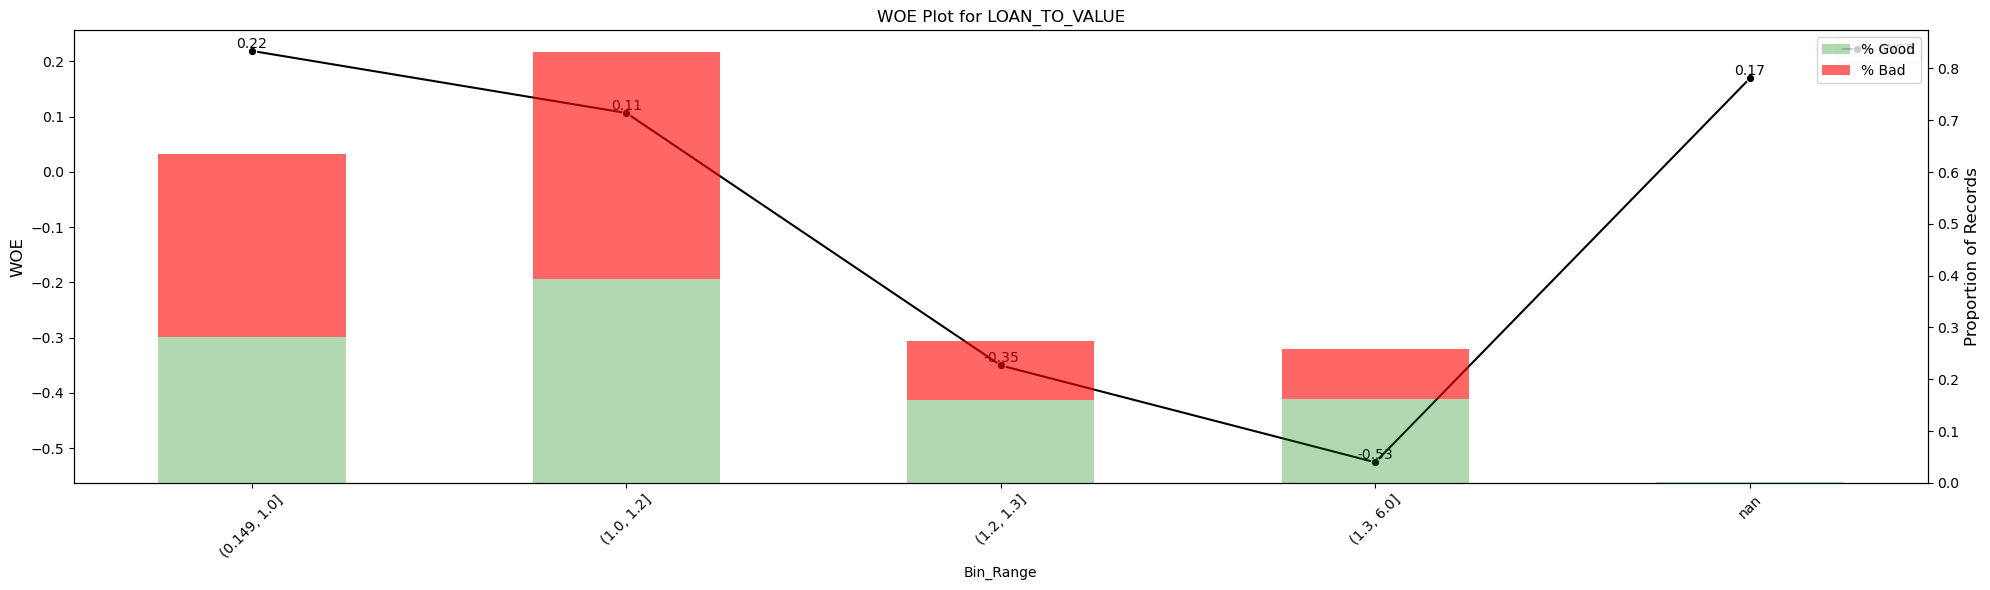

In [219]:
plot_numeric_woe(df, 'LOAN_TO_VALUE', 20)
plot_numeric_woe_manual(df, 'LOAN_TO_VALUE', [0.15,1,1.2, 1.3, 6])

IV for RATIO_LIFE_EMPLOYED with 20 bins: 0.0873


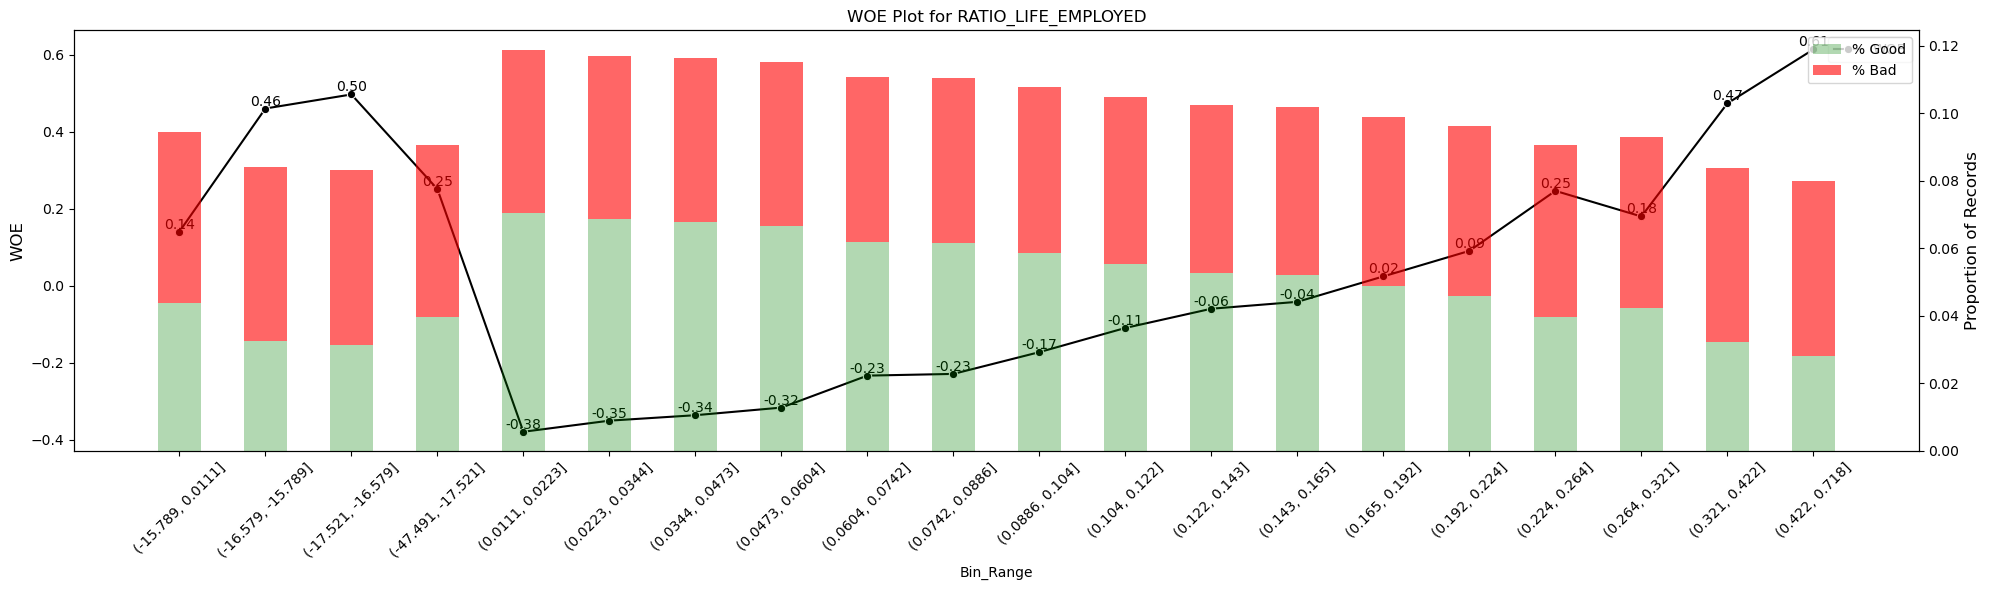


IV for RATIO_LIFE_EMPLOYED with 6 bins: 0.0782
WOE values per Bin_Range:
  (0.01, 0.07]: WOE = -0.326063
  (0.07, 0.12]: WOE = -0.185901
  (0.12, 0.19]: WOE = -0.028654
  (0.19, 0.22]: WOE = 0.106126
  (-47.001, 0.01]: WOE = 0.343586
  nan: WOE = 0.356690
IV for RATIO_LIFE_EMPLOYED with 6 bins: 0.0782


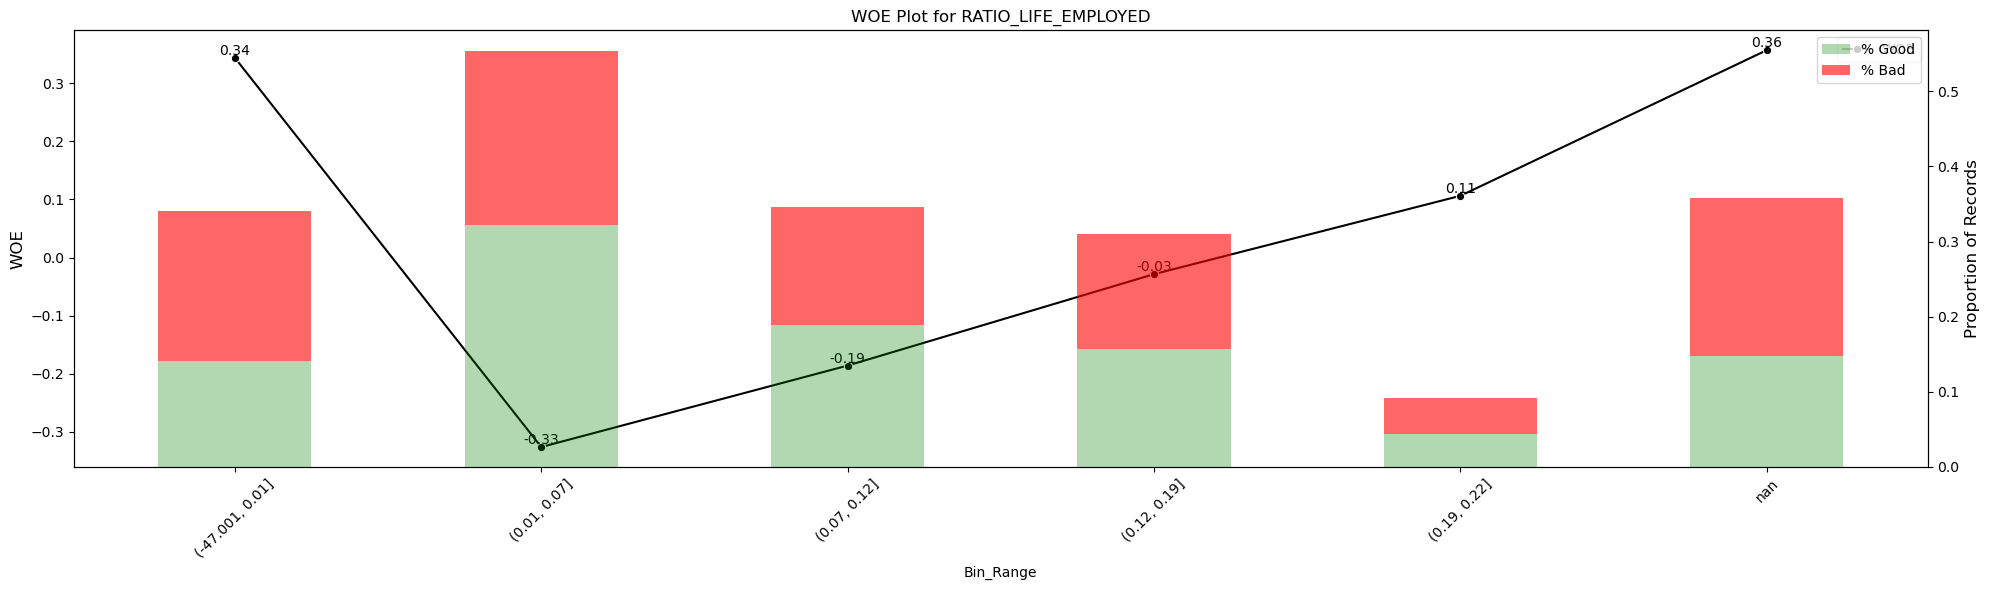

In [220]:
plot_numeric_woe(df, 'RATIO_LIFE_EMPLOYED', 20)
plot_numeric_woe_manual(df, 'RATIO_LIFE_EMPLOYED', [-47,0.01, 0.07, 0.12,0.19,0.22])

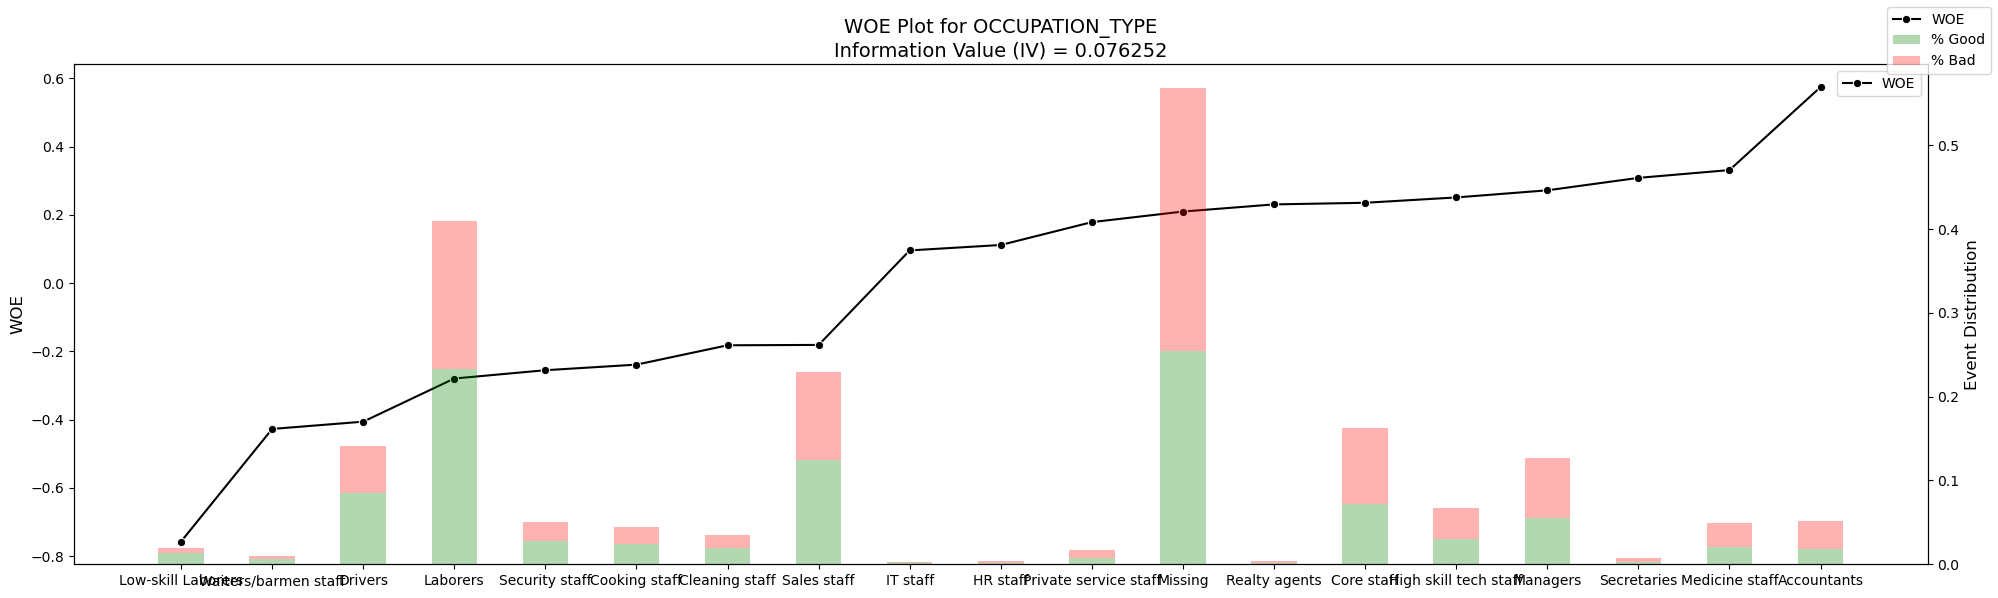

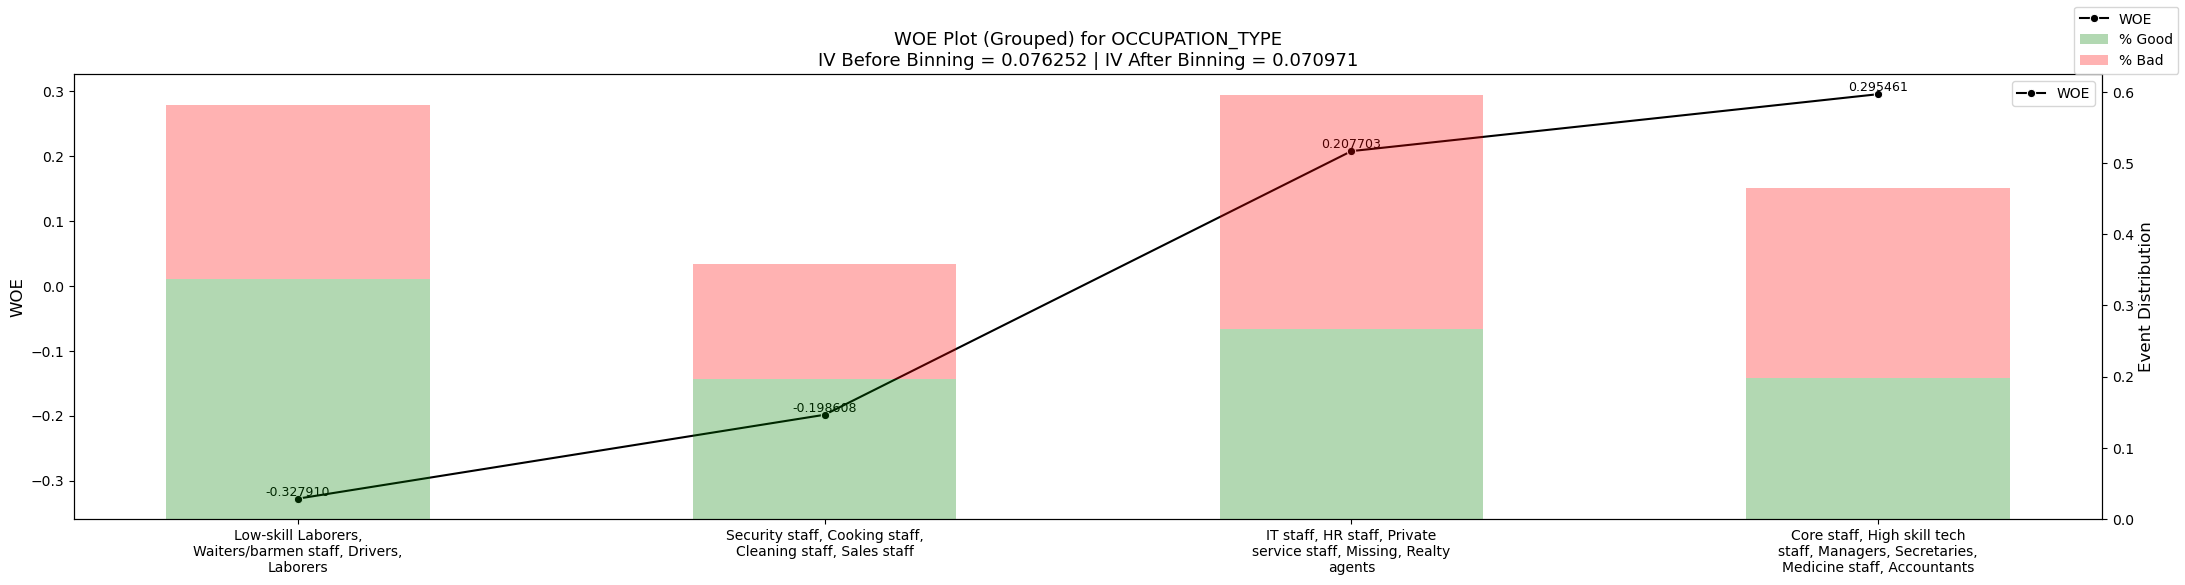


Information Value (IV) Before Binning: 0.076252
Information Value (IV) After Binning:  0.070971

WOE for each grouped bin:
Group 1:
  Categories: Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers
  WOE: -0.327910

Group 2:
  Categories: Security staff, Cooking staff, Cleaning staff, Sales staff
  WOE: -0.198608

Group 3:
  Categories: IT staff, HR staff, Private service staff, Missing, Realty agents
  WOE: 0.207703

Group 4:
  Categories: Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants
  WOE: 0.295461



In [222]:
woe_iv_plot_categorical(df, "OCCUPATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "OCCUPATION_TYPE", [0,4,8,13,19], target_name='TARGET')

IV for DAYS_CREDIT_min with 21 bins: 0.0843


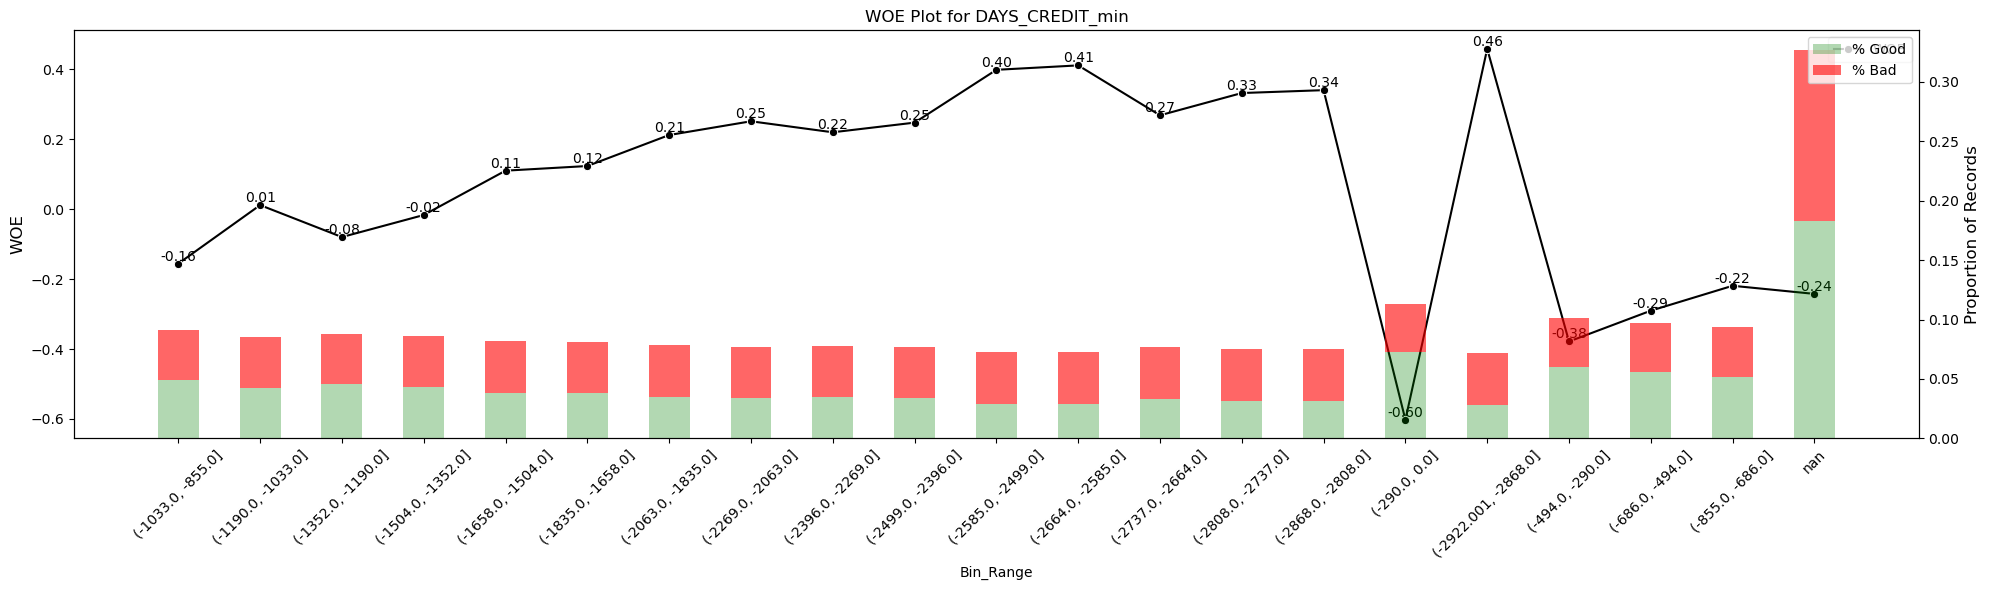


IV for DAYS_CREDIT_min with 5 bins: 0.0682
WOE values per Bin_Range:
  (-1000.0, -200.0]: WOE = -0.299397
  nan: WOE = -0.255686
  (-1500.0, -1000.0]: WOE = -0.039710
  (-2500.0, -1500.0]: WOE = 0.193110
  (-2900.001, -2500.0]: WOE = 0.363737
IV for DAYS_CREDIT_min with 5 bins: 0.0682


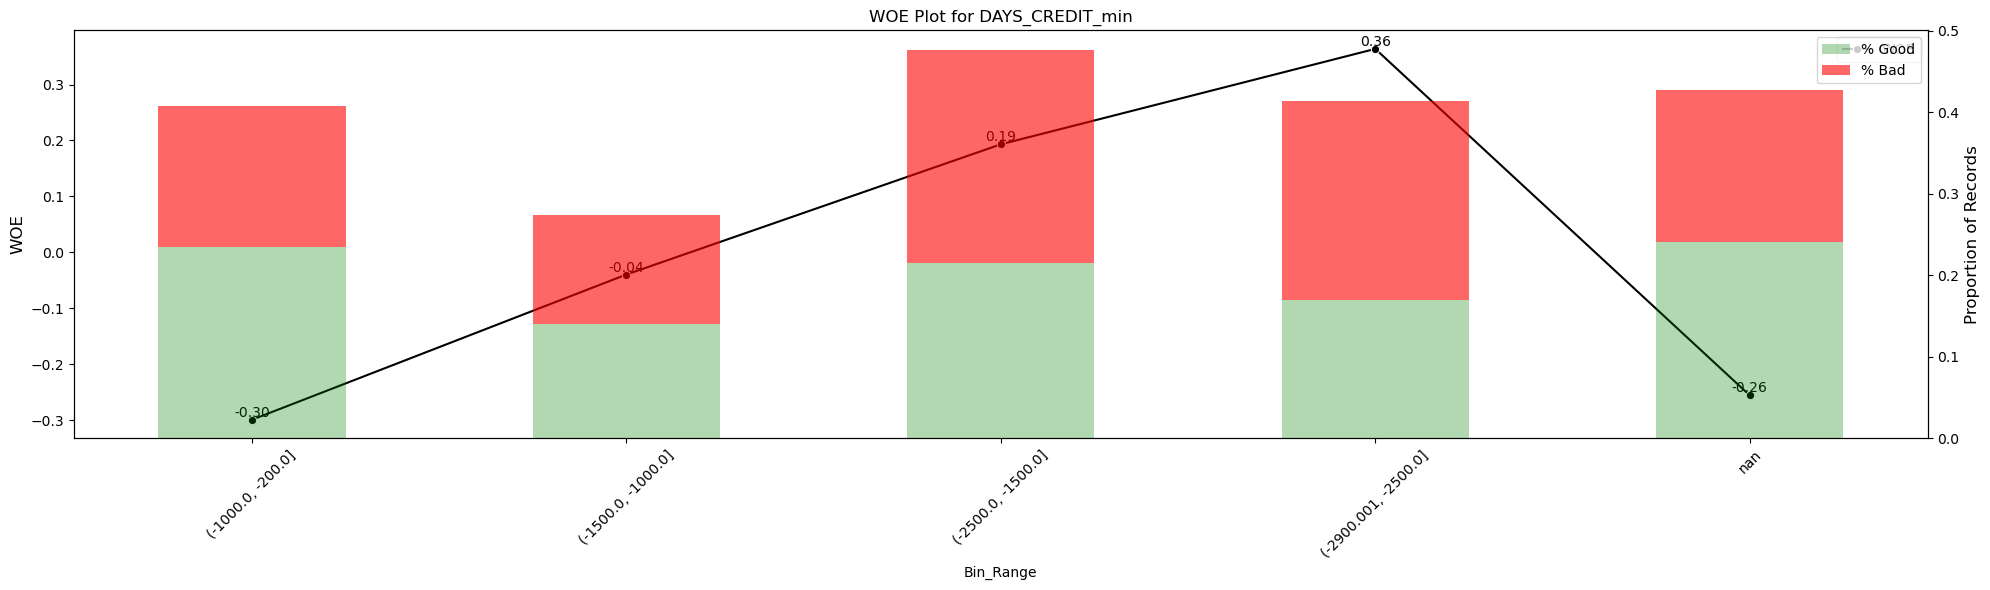

In [223]:
plot_numeric_woe(df, 'DAYS_CREDIT_min', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_min', [-2900,-2500,-1500, -1000, -200])

IV for DAYS_CREDIT_ENDDATE_mean with 21 bins: 0.0793


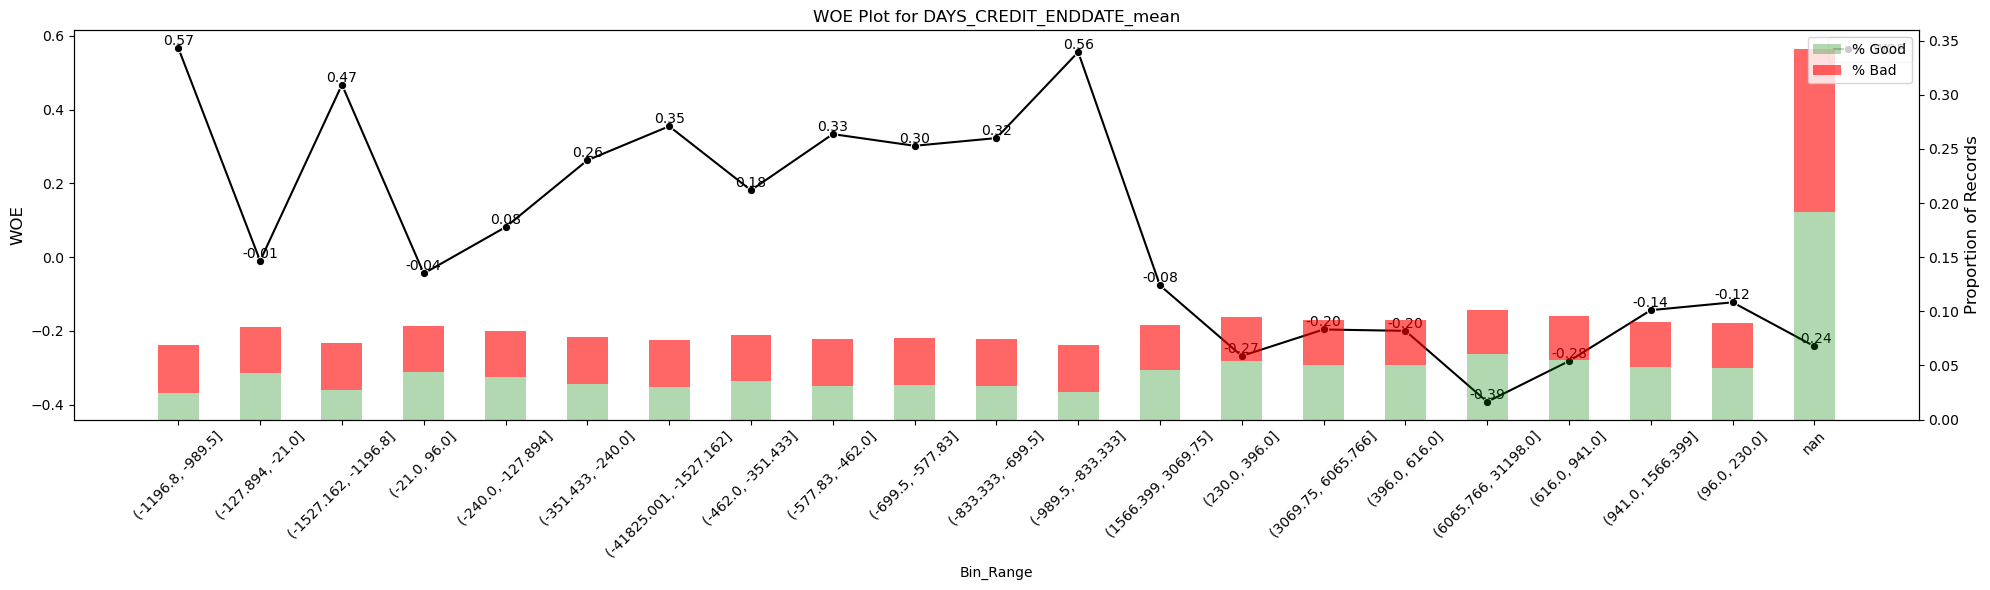


IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0729
WOE values per Bin_Range:
  nan: WOE = -0.241979
  (200.0, 32000.0]: WOE = -0.225333
  (-200.0, 200.0]: WOE = -0.033907
  (-500.0, -200.0]: WOE = 0.231916
  (-41800.001, -500.0]: WOE = 0.411492
IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0729


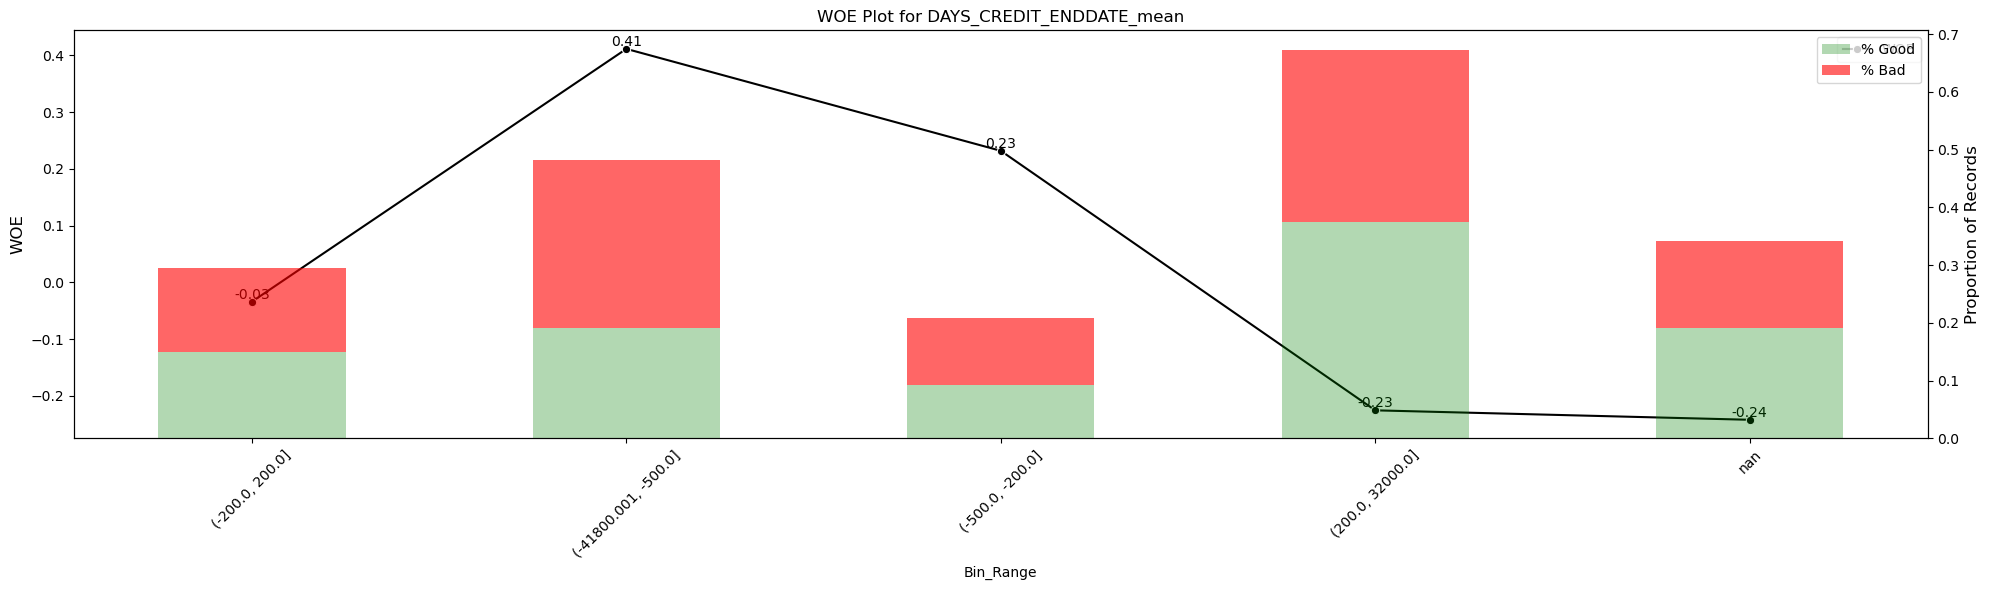

In [225]:
plot_numeric_woe(df, 'DAYS_CREDIT_ENDDATE_mean', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_ENDDATE_mean', [-41800,-500,-200, 200, 32000])

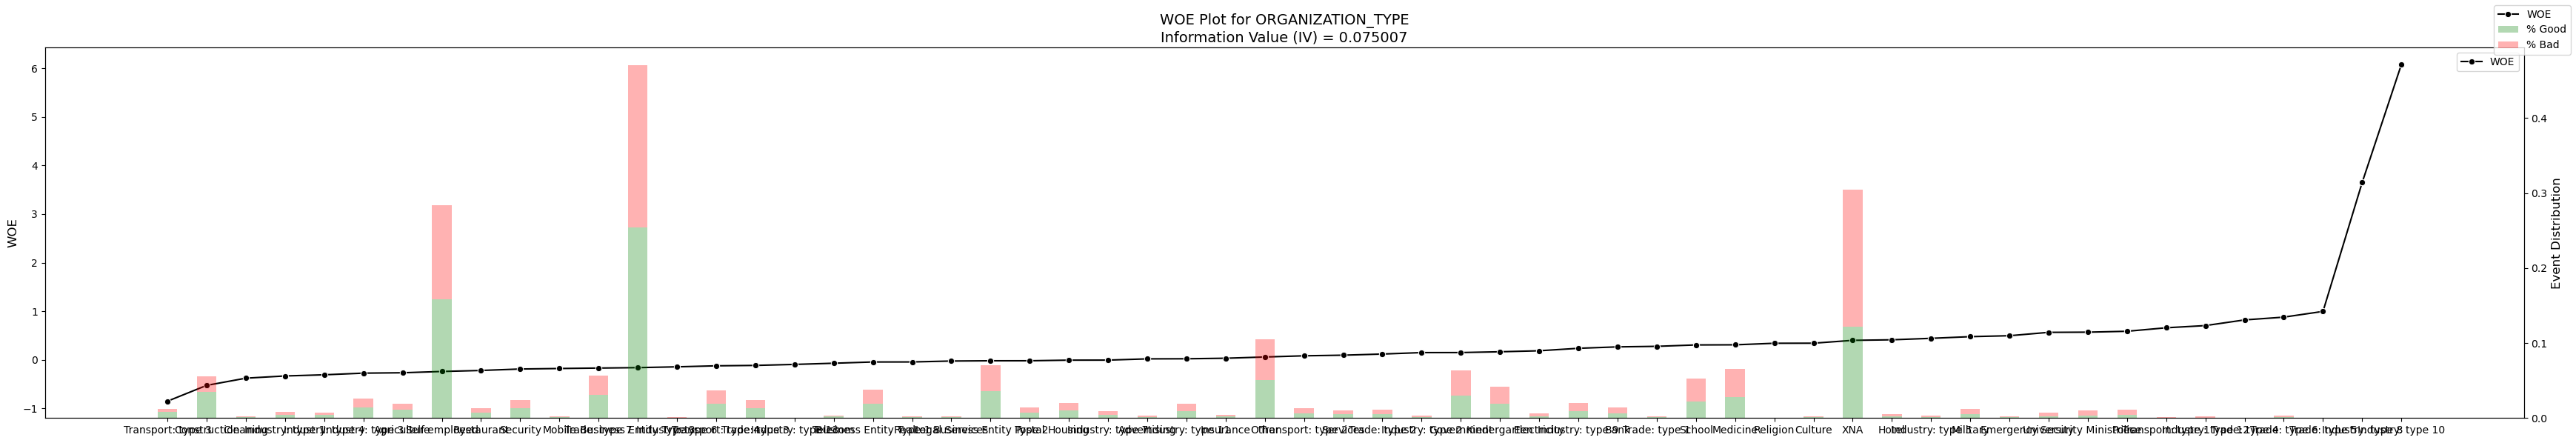

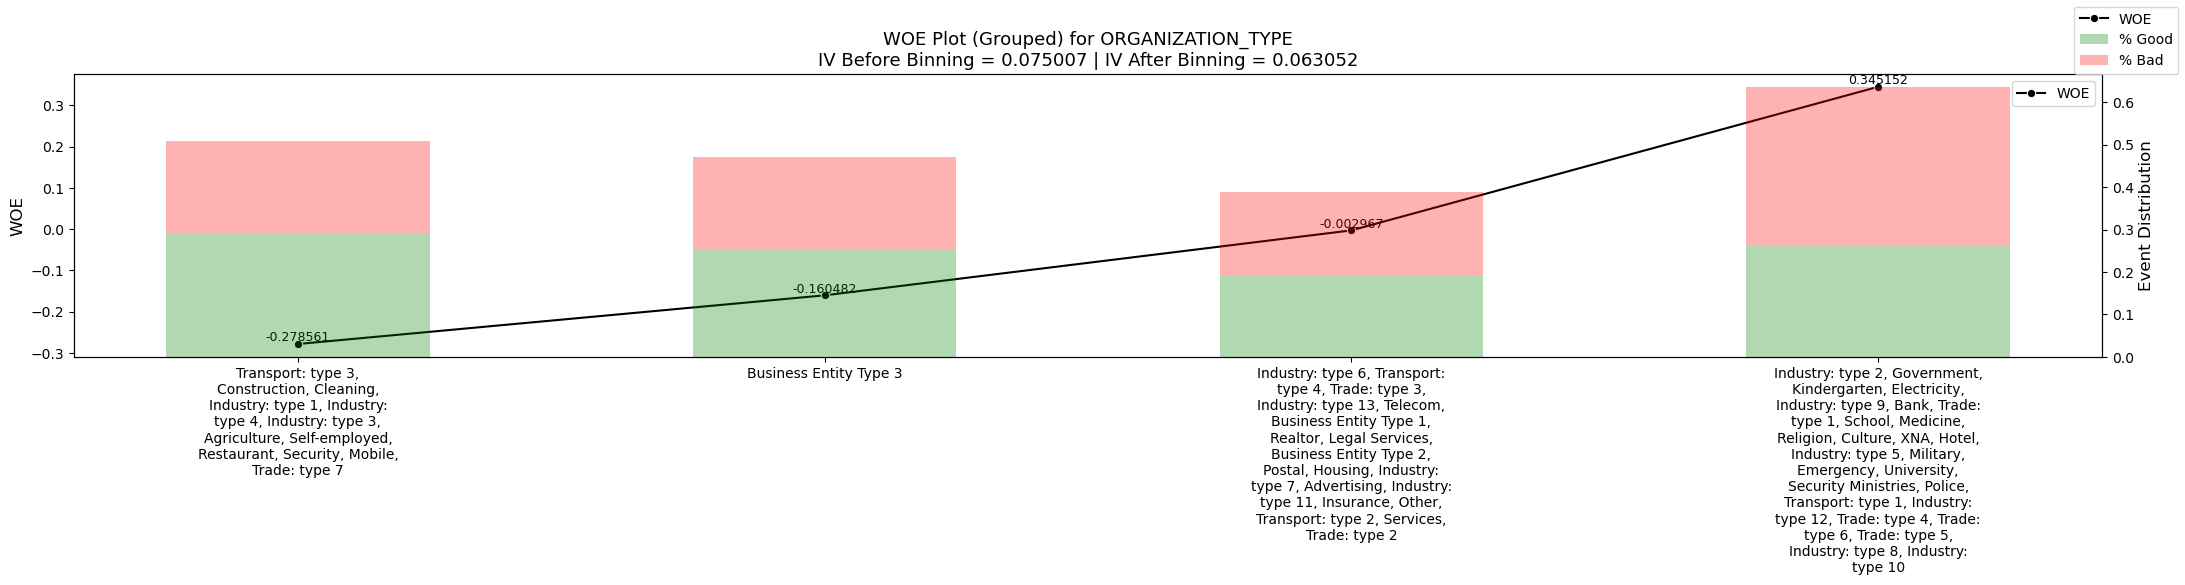


Information Value (IV) Before Binning: 0.075007
Information Value (IV) After Binning:  0.063052

WOE for each grouped bin:
Group 1:
  Categories: Transport: type 3, Construction, Cleaning, Industry: type 1, Industry: type 4, Industry: type 3, Agriculture, Self-employed, Restaurant, Security, Mobile, Trade: type 7
  WOE: -0.278561

Group 2:
  Categories: Business Entity Type 3
  WOE: -0.160482

Group 3:
  Categories: Industry: type 6, Transport: type 4, Trade: type 3, Industry: type 13, Telecom, Business Entity Type 1, Realtor, Legal Services, Business Entity Type 2, Postal, Housing, Industry: type 7, Advertising, Industry: type 11, Insurance, Other, Transport: type 2, Services, Trade: type 2
  WOE: -0.002967

Group 4:
  Categories: Industry: type 2, Government, Kindergarten, Electricity, Industry: type 9, Bank, Trade: type 1, School, Medicine, Religion, Culture, XNA, Hotel, Industry: type 5, Military, Emergency, University, Security Ministries, Police, Transport: type 1, Industry: typ

In [227]:
woe_iv_plot_categorical(df, "ORGANIZATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "ORGANIZATION_TYPE", [0,12,13,32,60], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_mean with 17 bins: 0.0519


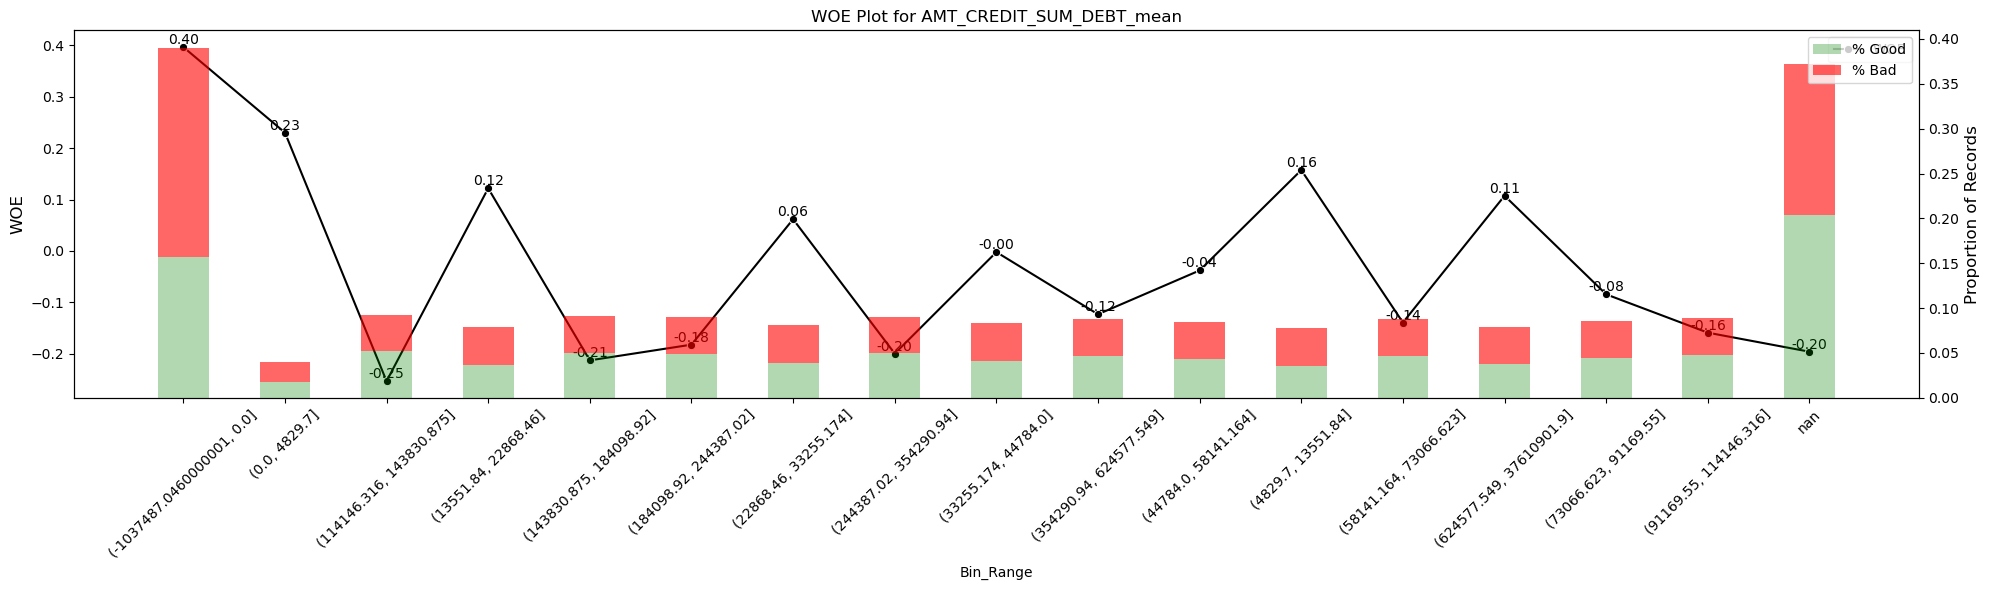


IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.042
WOE values per Bin_Range:
  nan: WOE = -0.166677
  (2000.0, 120000.0]: WOE = -0.011299
  (-2000000.001, 2000.0]: WOE = 0.384418
IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.042


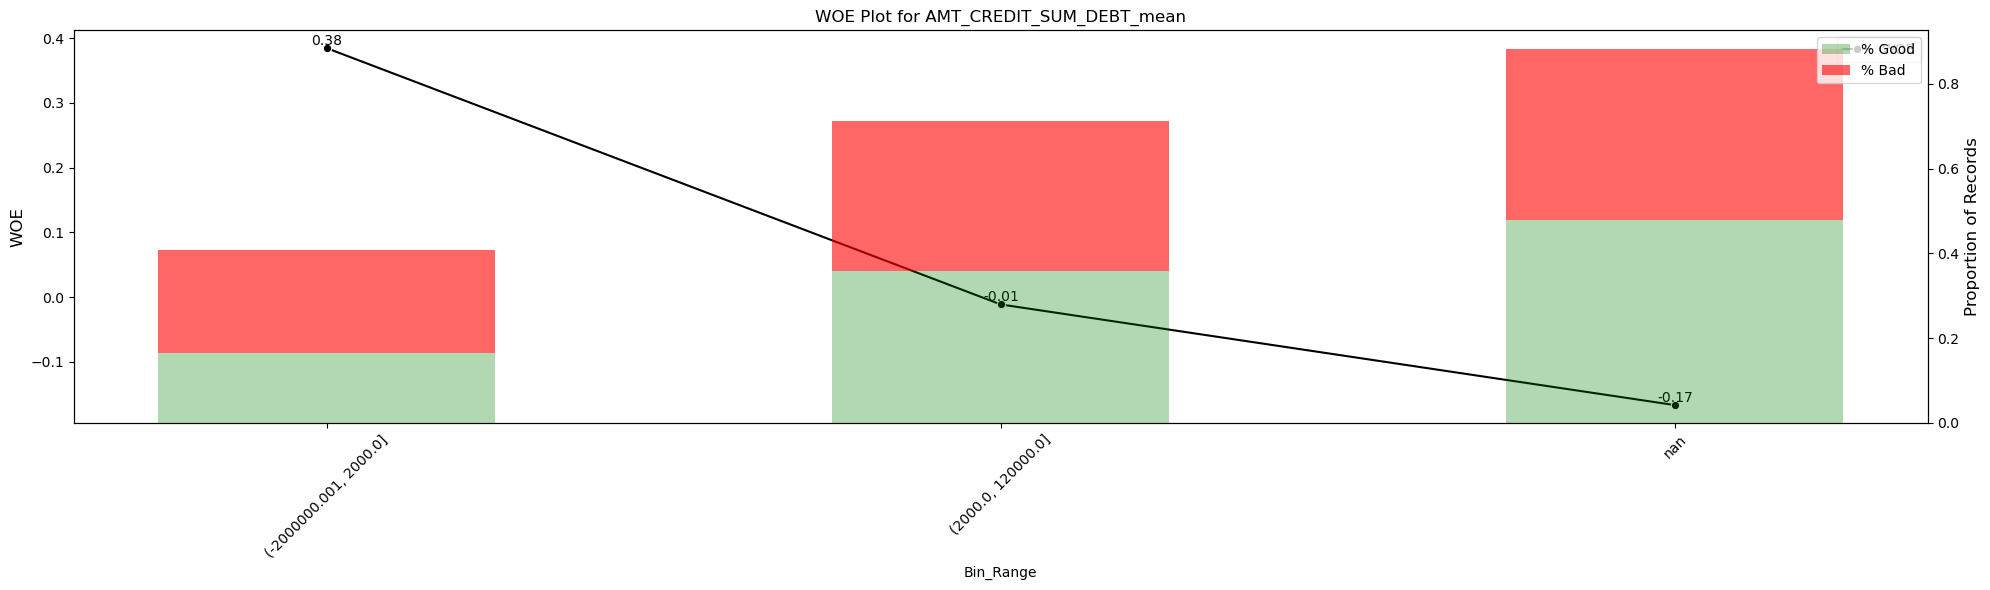

In [228]:
plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_mean', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_mean', [-2000000,2000, 120000])
# why are the ranges so weird? what does this even mean

IV for CREDIT_ACTIVE_Active with 7 bins: 0.0511


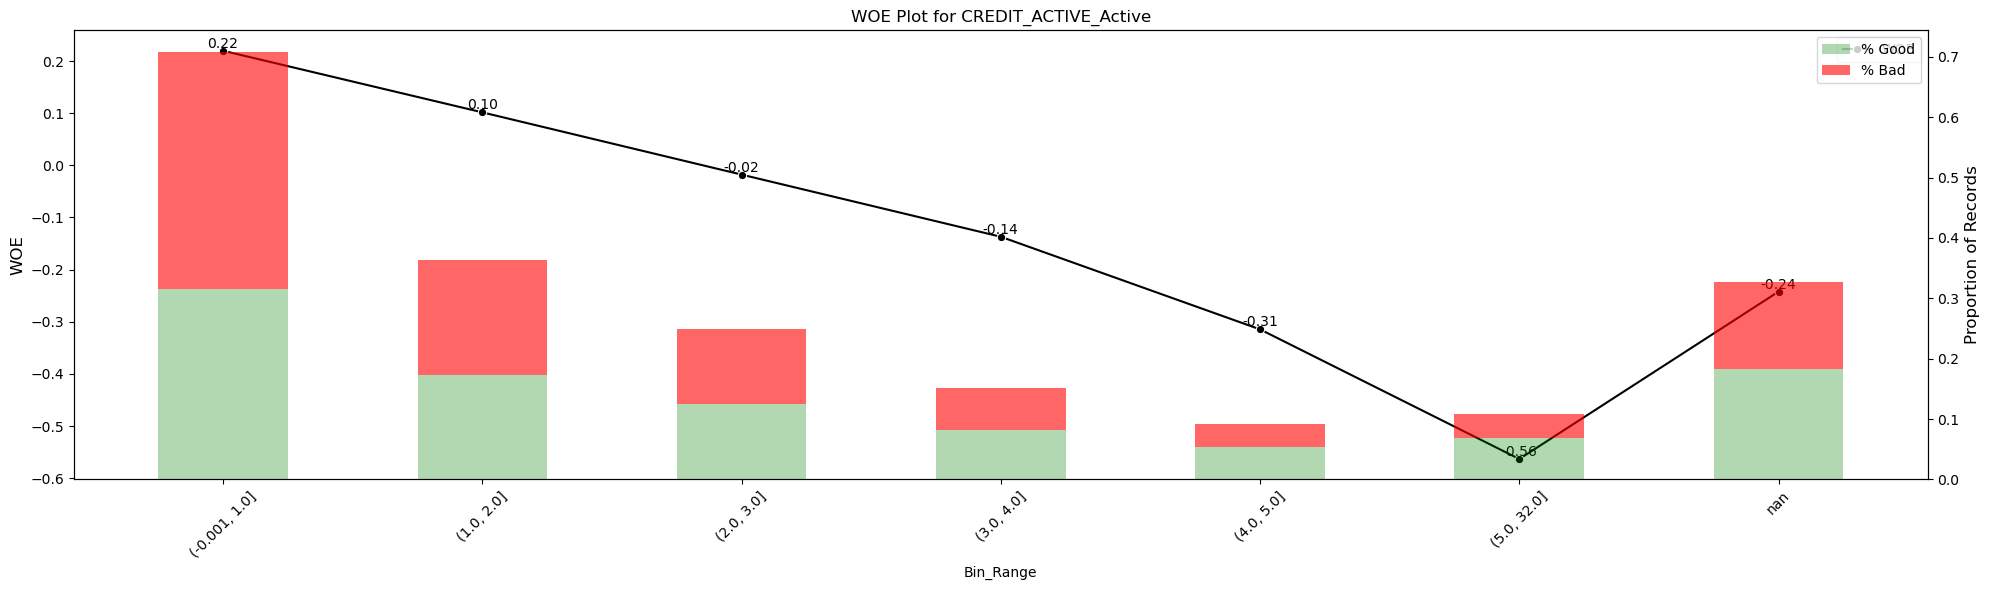


IV for CREDIT_ACTIVE_Active with 4 bins: 0.0444
WOE values per Bin_Range:
  (3.0, 32.0]: WOE = -0.311623
  nan: WOE = -0.242155
  (1.0, 3.0]: WOE = 0.053109
  (-0.001, 1.0]: WOE = 0.219705
IV for CREDIT_ACTIVE_Active with 4 bins: 0.0444


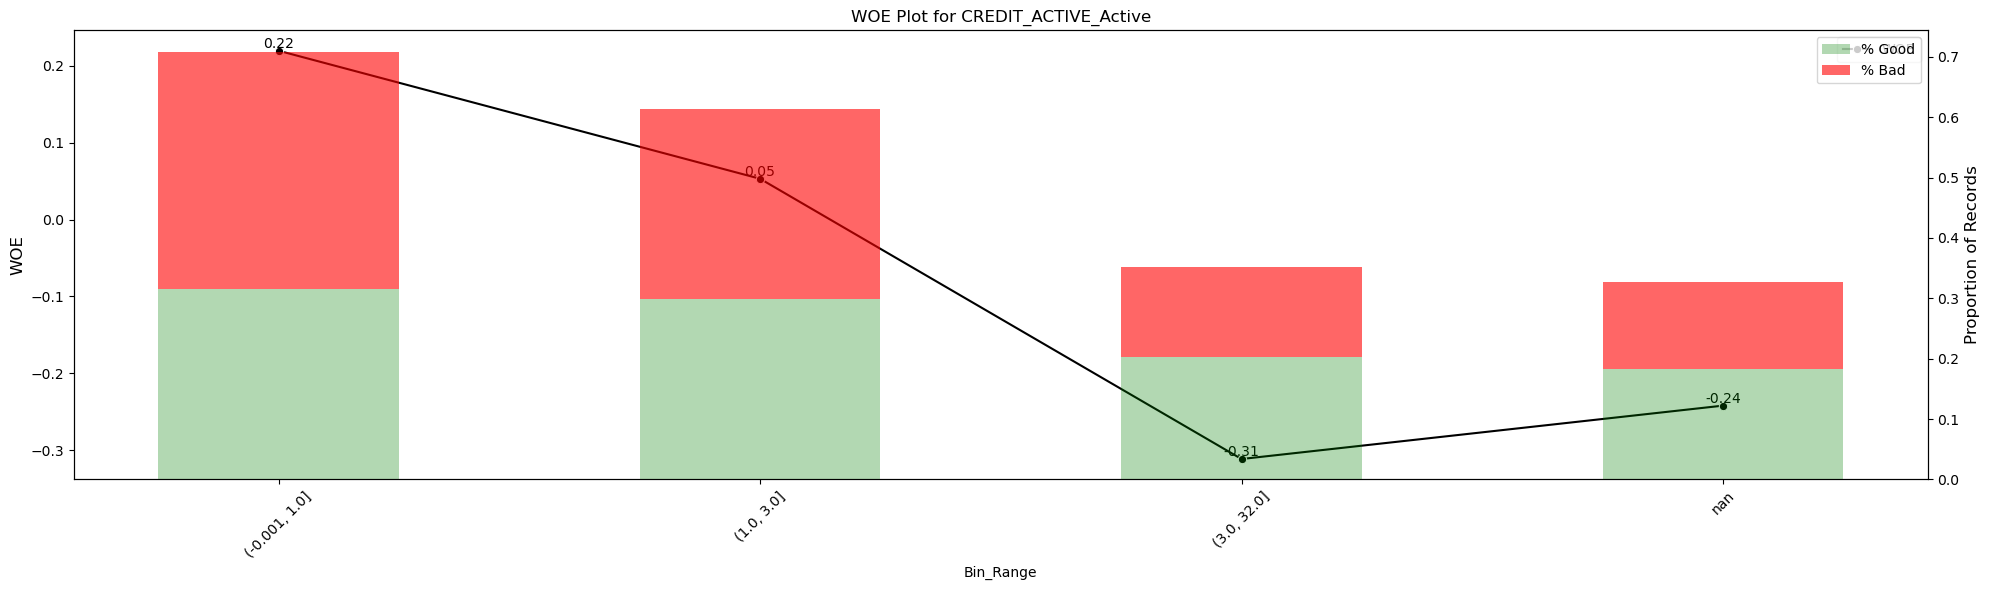

In [229]:
# df.info()
plot_numeric_woe(df, 'CREDIT_ACTIVE_Active', 20)
plot_numeric_woe_manual(df, 'CREDIT_ACTIVE_Active', [0,1,3,32])

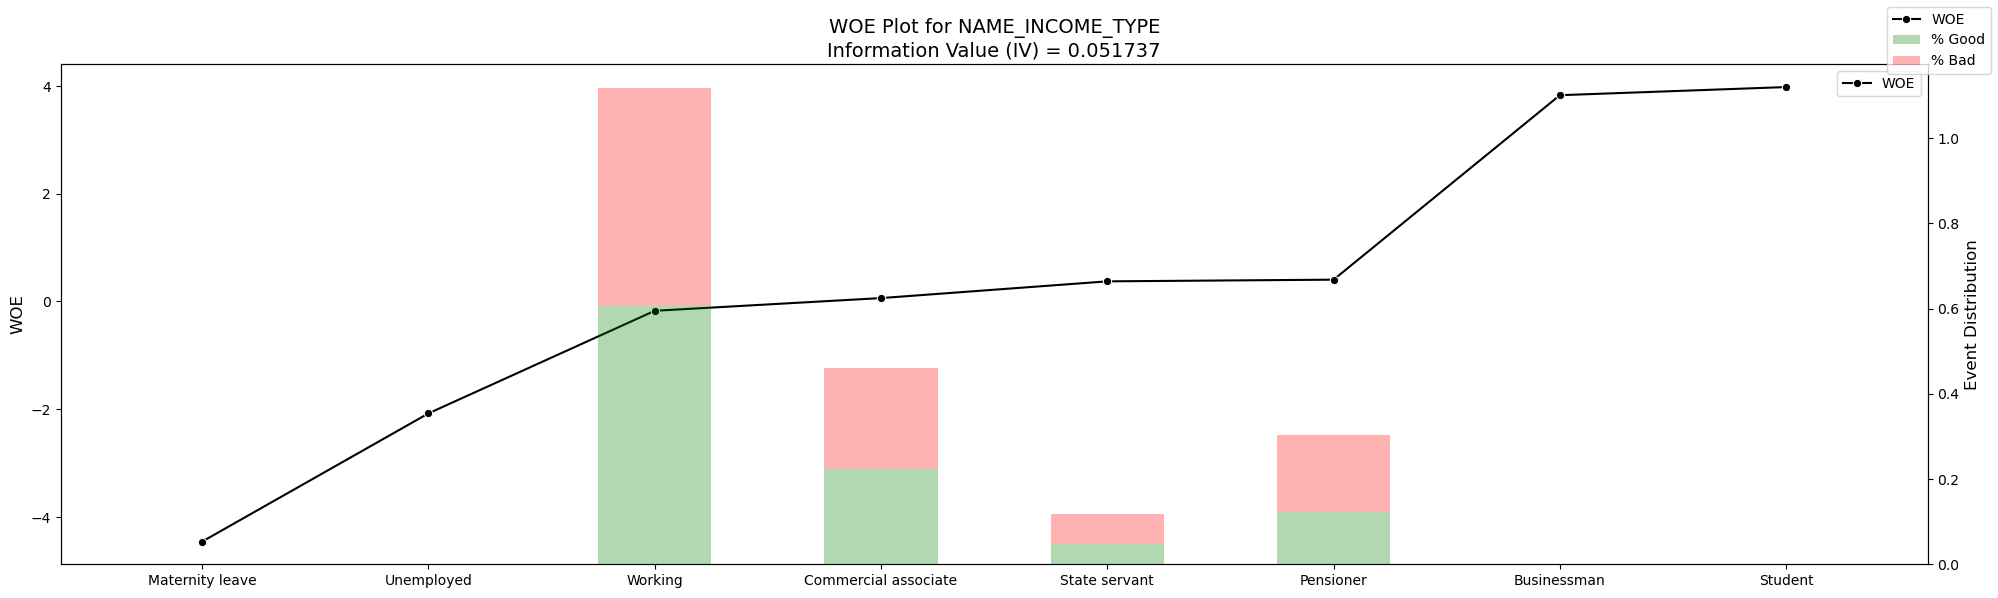

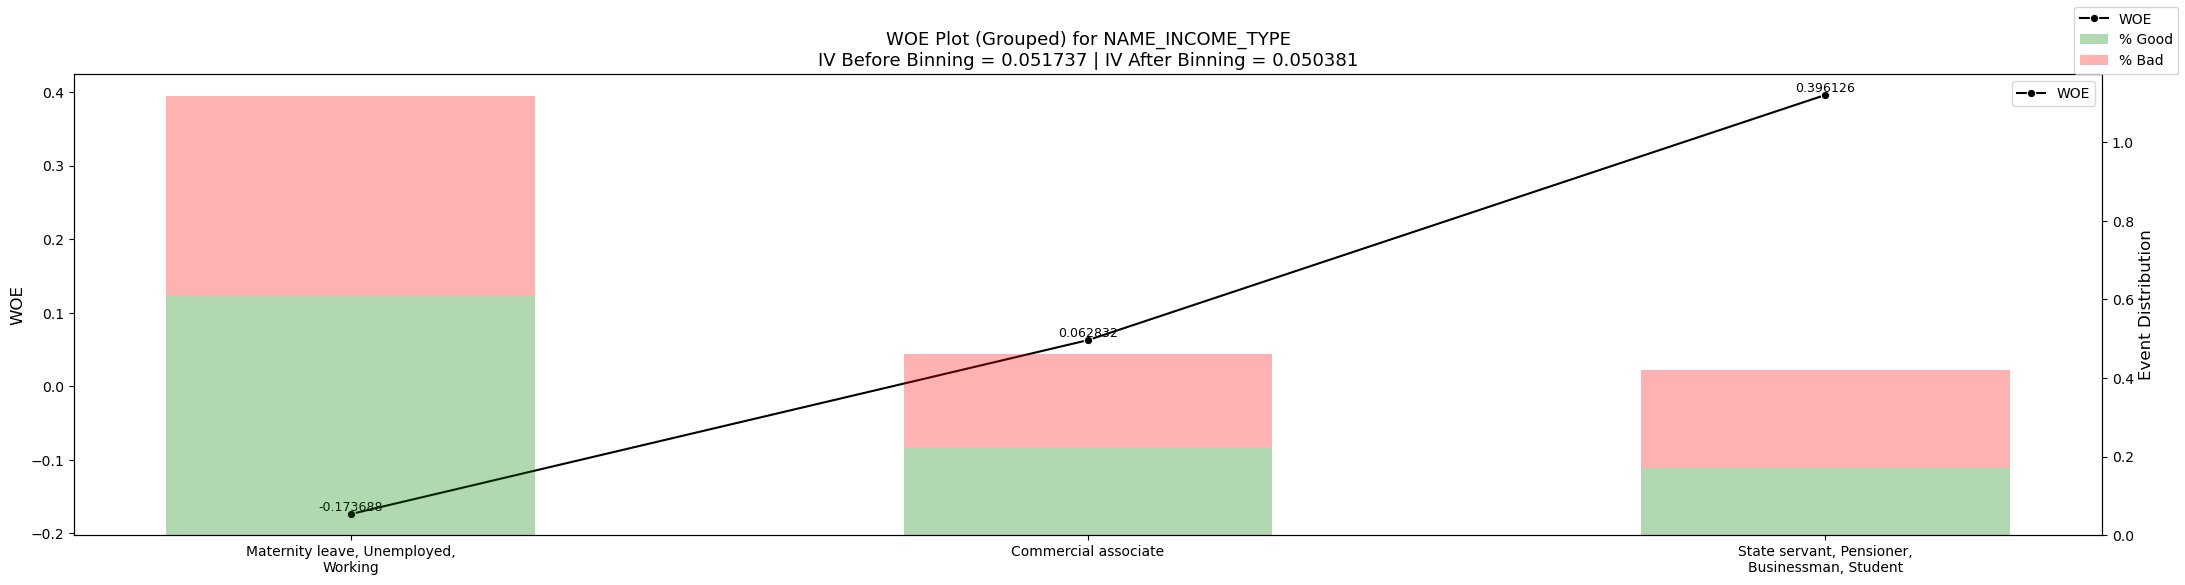


Information Value (IV) Before Binning: 0.051737
Information Value (IV) After Binning:  0.050381

WOE for each grouped bin:
Group 1:
  Categories: Maternity leave, Unemployed, Working
  WOE: -0.173688

Group 2:
  Categories: Commercial associate
  WOE: 0.062832

Group 3:
  Categories: State servant, Pensioner, Businessman, Student
  WOE: 0.396126



In [230]:
woe_iv_plot_categorical(df, "NAME_INCOME_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_INCOME_TYPE", [0,3,4,8], target_name='TARGET')

IV for DAYS_LAST_PHONE_CHANGE with 18 bins: 0.0521


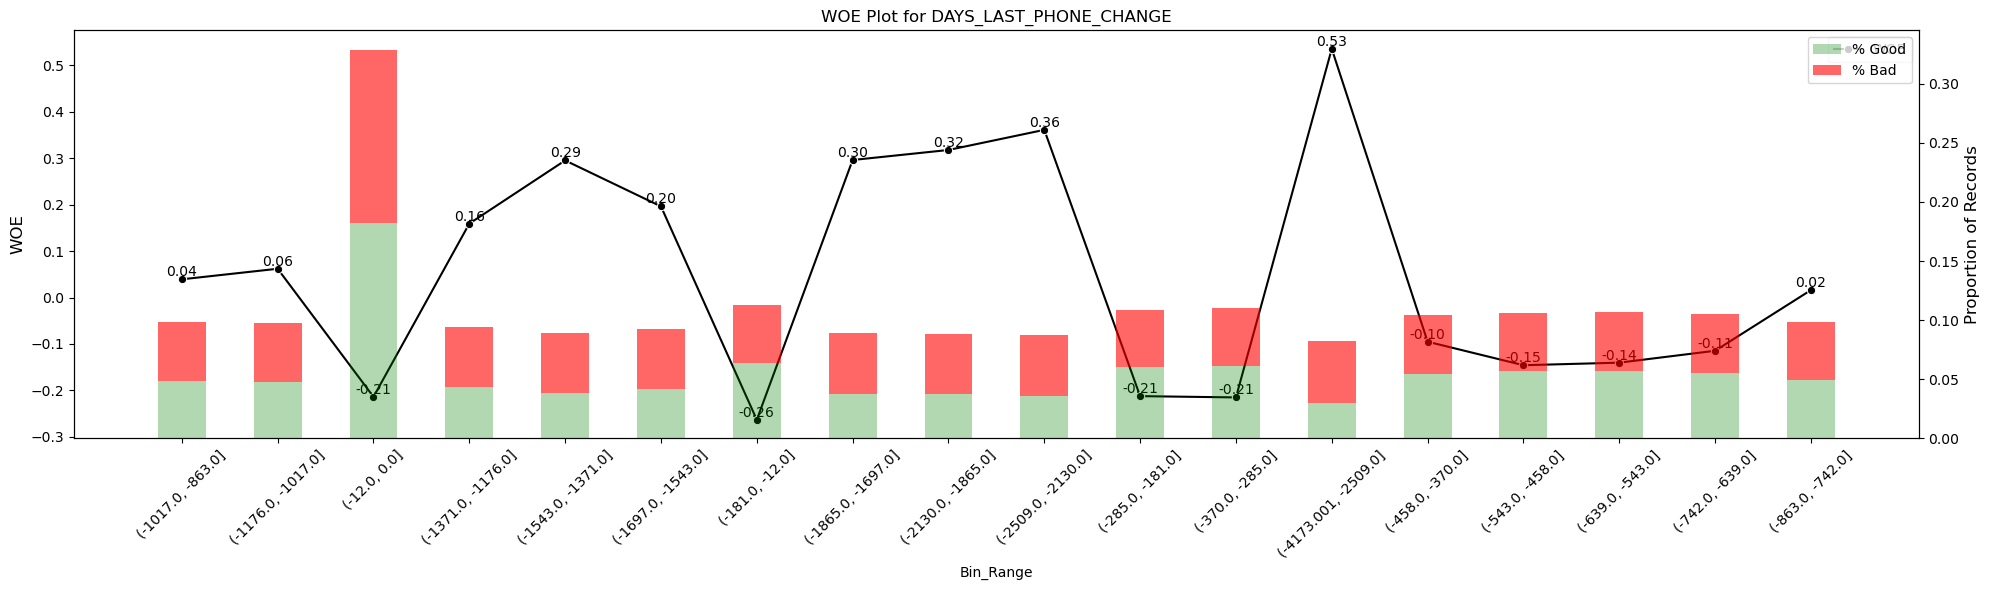


IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0495
WOE values per Bin_Range:
  nan: WOE = -0.213731
  (-750.0, -10.0]: WOE = -0.169176
  (-1400.0, -750.0]: WOE = 0.069524
  (-2100.0, -1400.0]: WOE = 0.279122
  (-4200.001, -2100.0]: WOE = 0.444128
IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0495


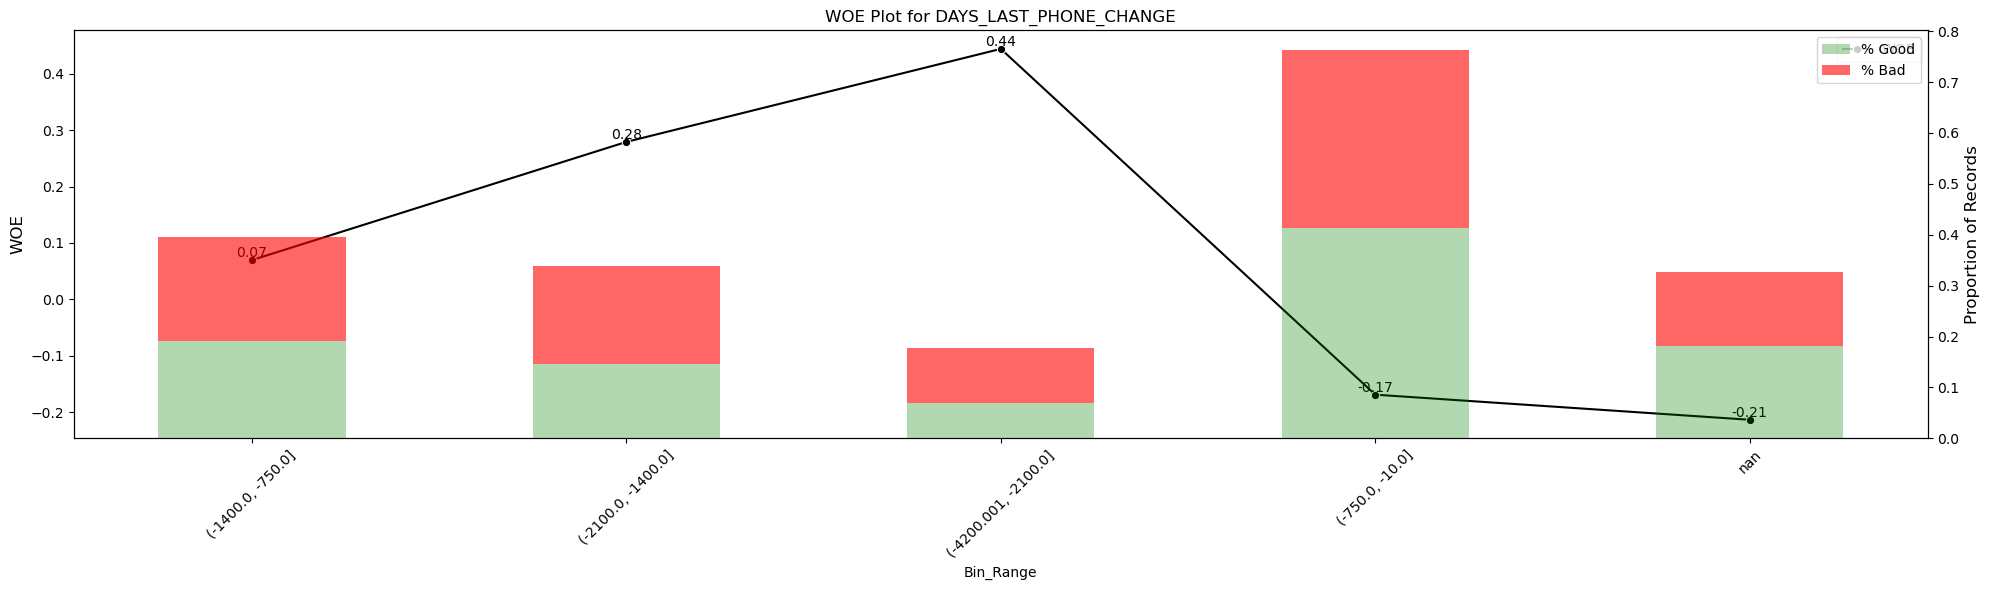

In [231]:
plot_numeric_woe(df, 'DAYS_LAST_PHONE_CHANGE', 20)
plot_numeric_woe_manual(df, 'DAYS_LAST_PHONE_CHANGE', [-4200,-2100, -1400, -750, -10])

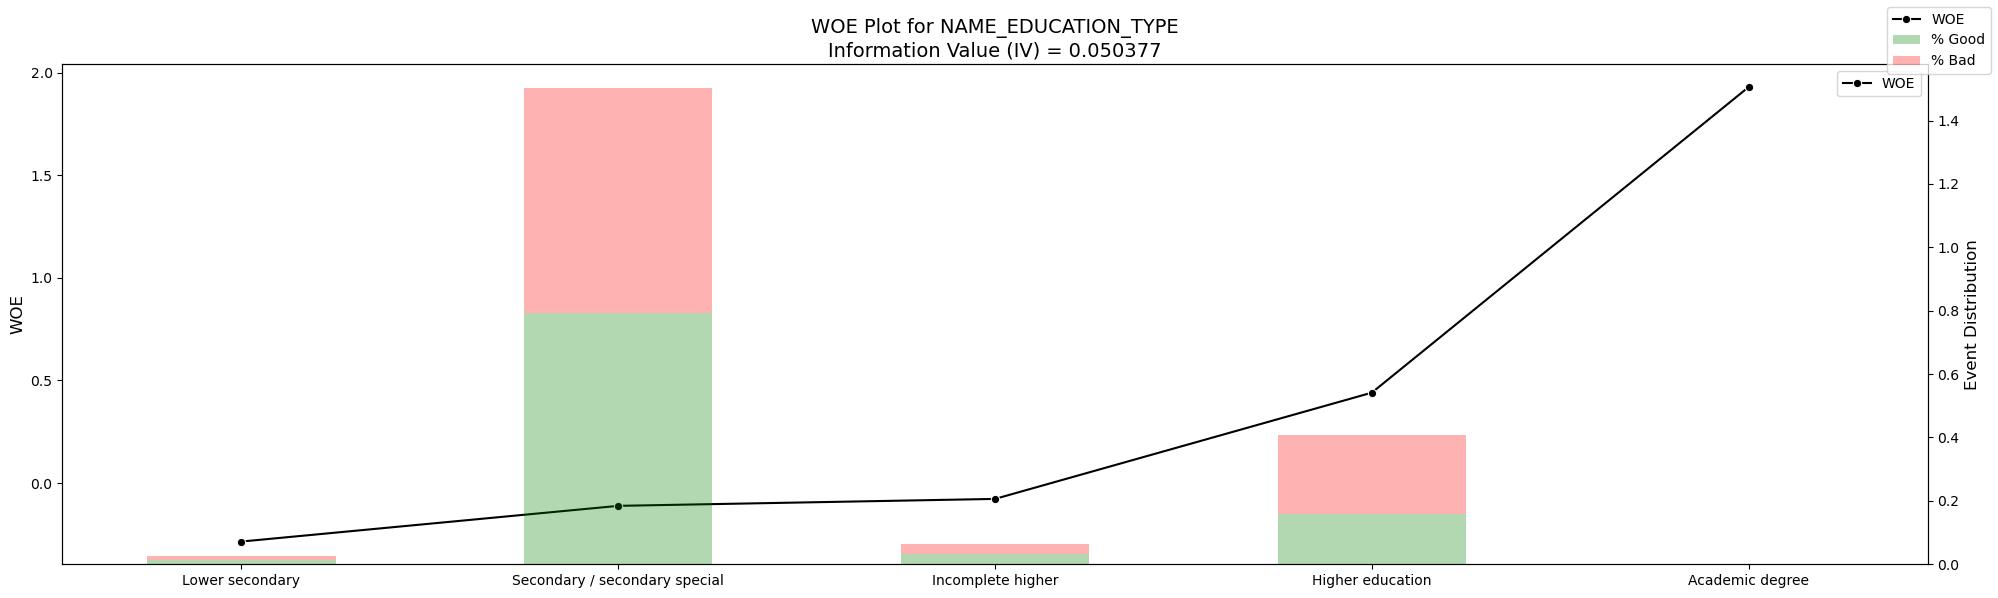

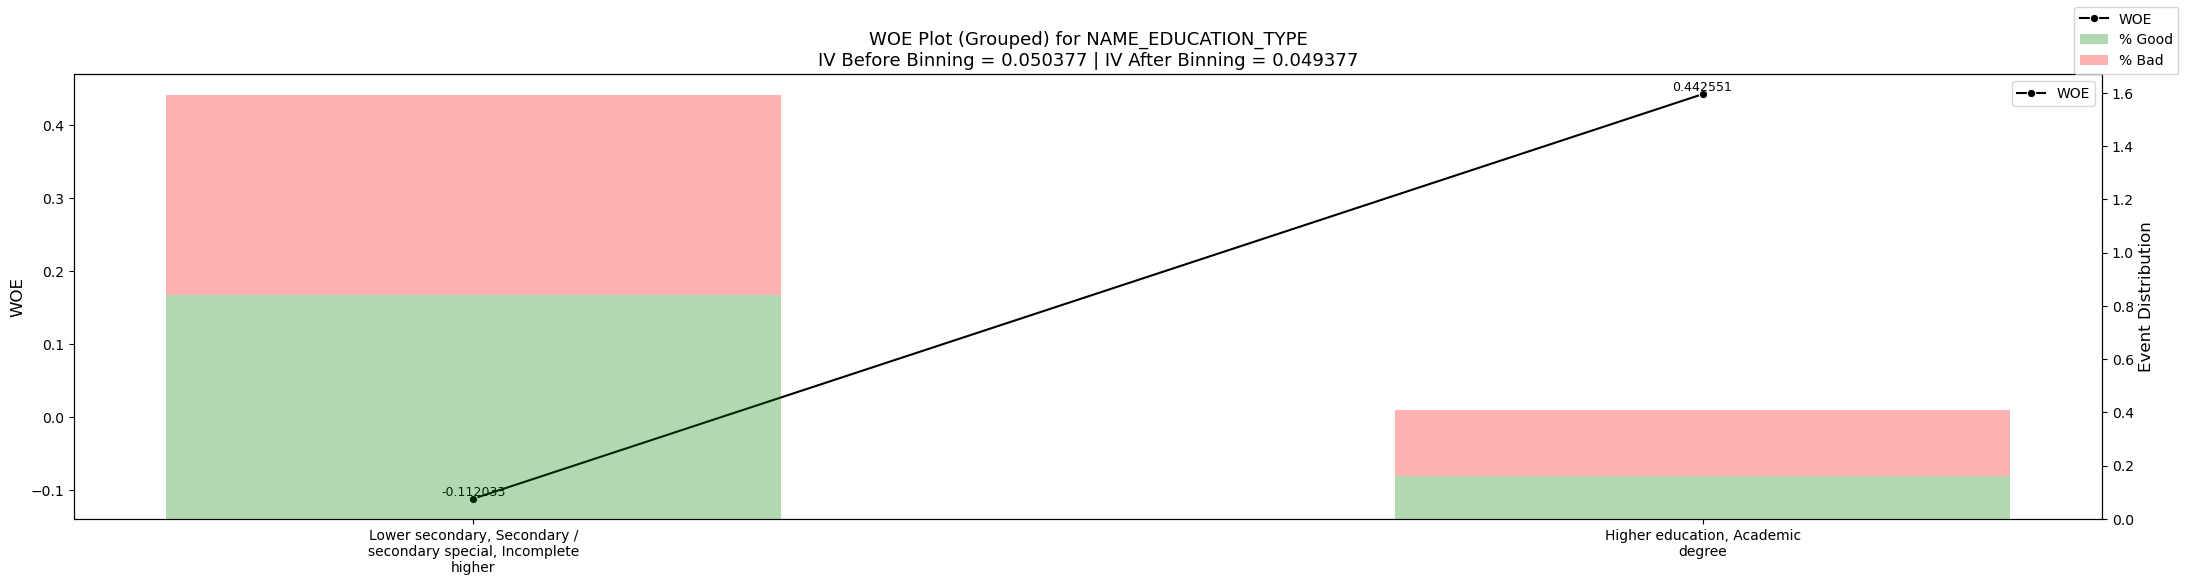


Information Value (IV) Before Binning: 0.050377
Information Value (IV) After Binning:  0.049377

WOE for each grouped bin:
Group 1:
  Categories: Lower secondary, Secondary / secondary special, Incomplete higher
  WOE: -0.112033

Group 2:
  Categories: Higher education, Academic degree
  WOE: 0.442551



In [232]:
woe_iv_plot_categorical(df, "NAME_EDUCATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_EDUCATION_TYPE", [0,3,5], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_sum with 17 bins: 0.0465


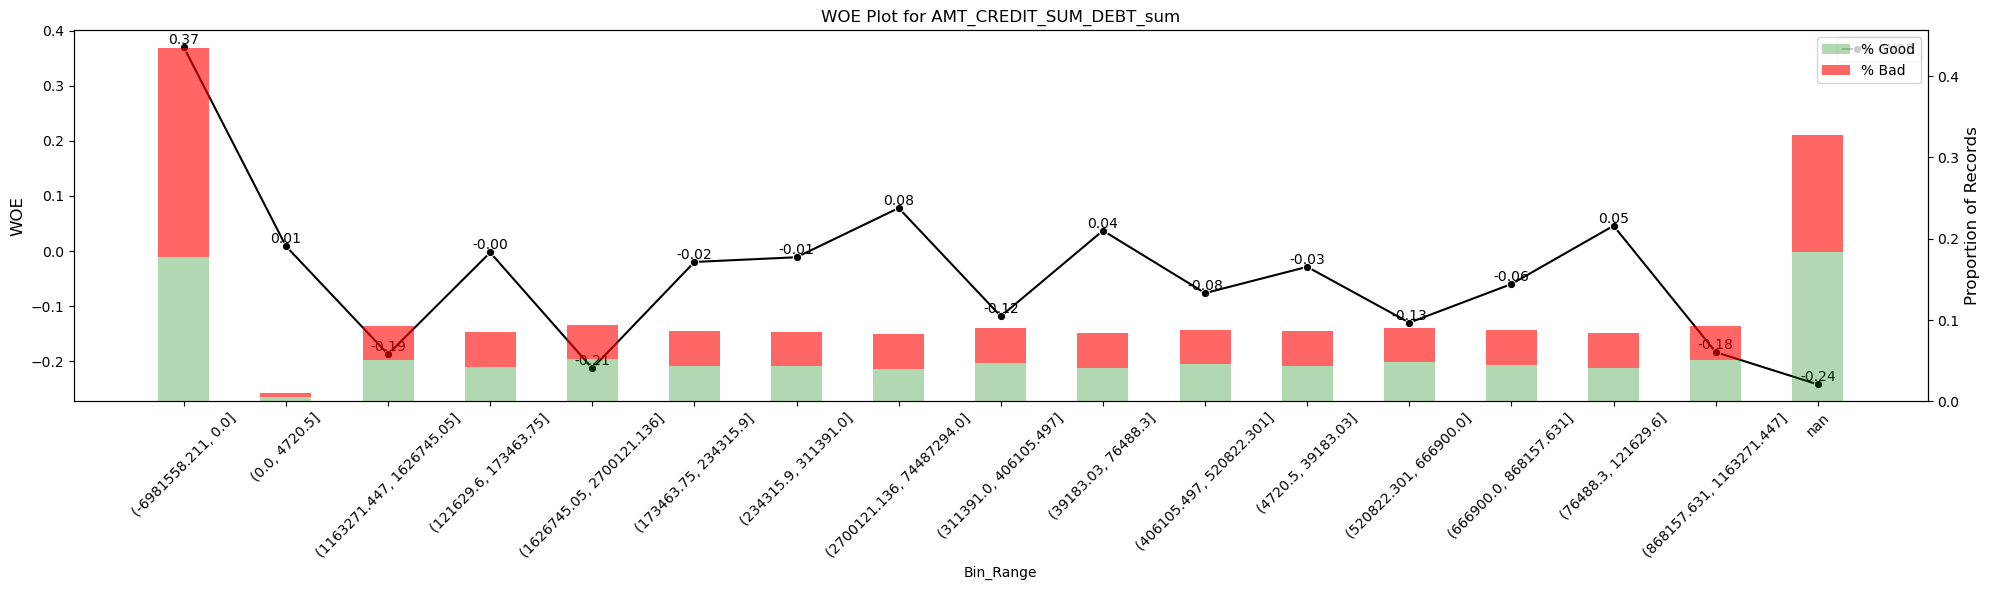


IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0424
WOE values per Bin_Range:
  nan: WOE = -0.185487
  (300000.0, 1200000.0]: WOE = -0.110509
  (0.0, 300000.0]: WOE = 0.002592
  (-70000000.001, 0.0]: WOE = 0.370085
IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0424


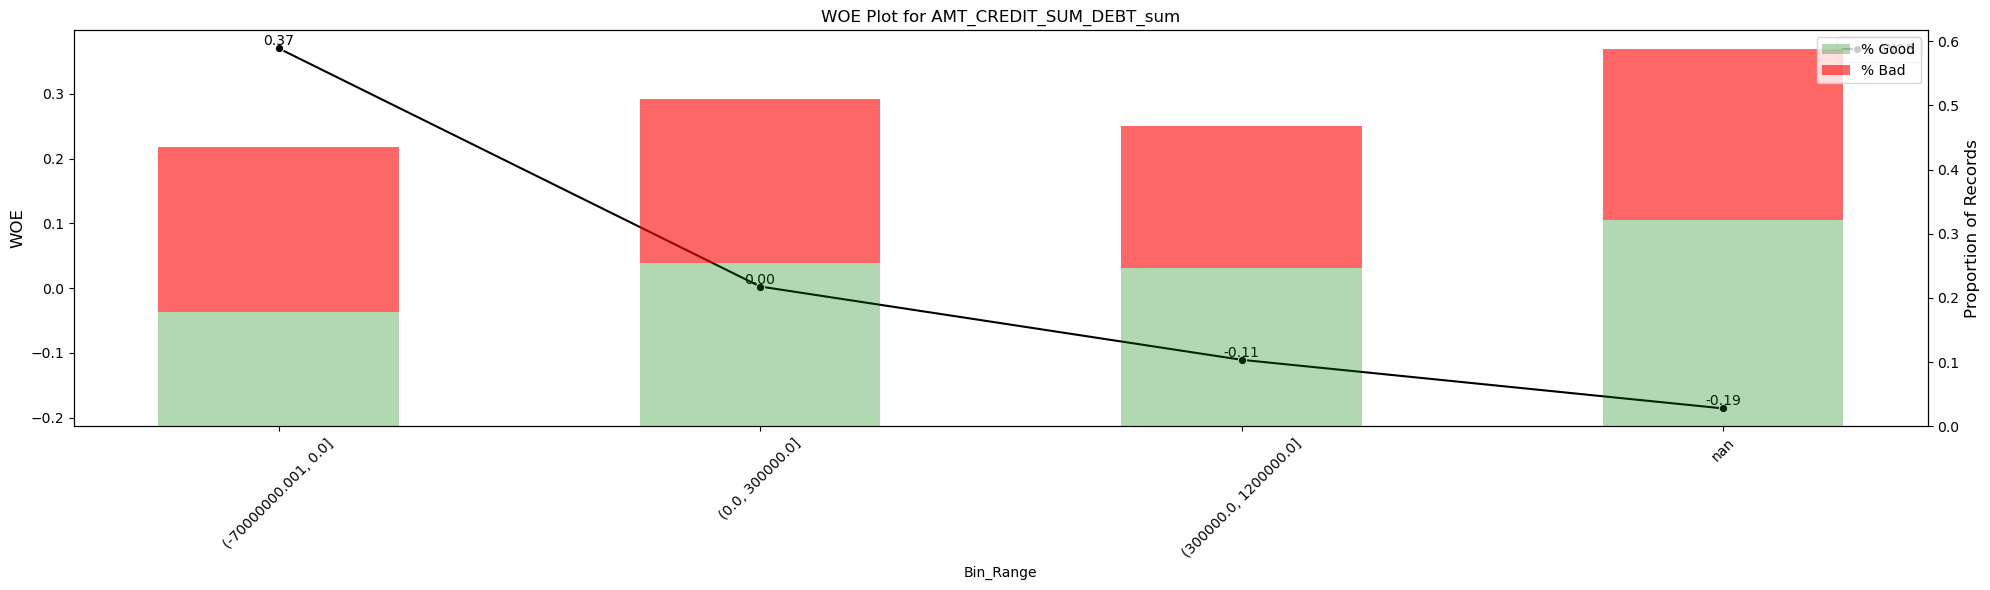

In [233]:

plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_sum', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_sum', [-70000000, 0, 300000, 1200000])

IV for REGION_POPULATION_RELATIVE with 20 bins: 0.0451


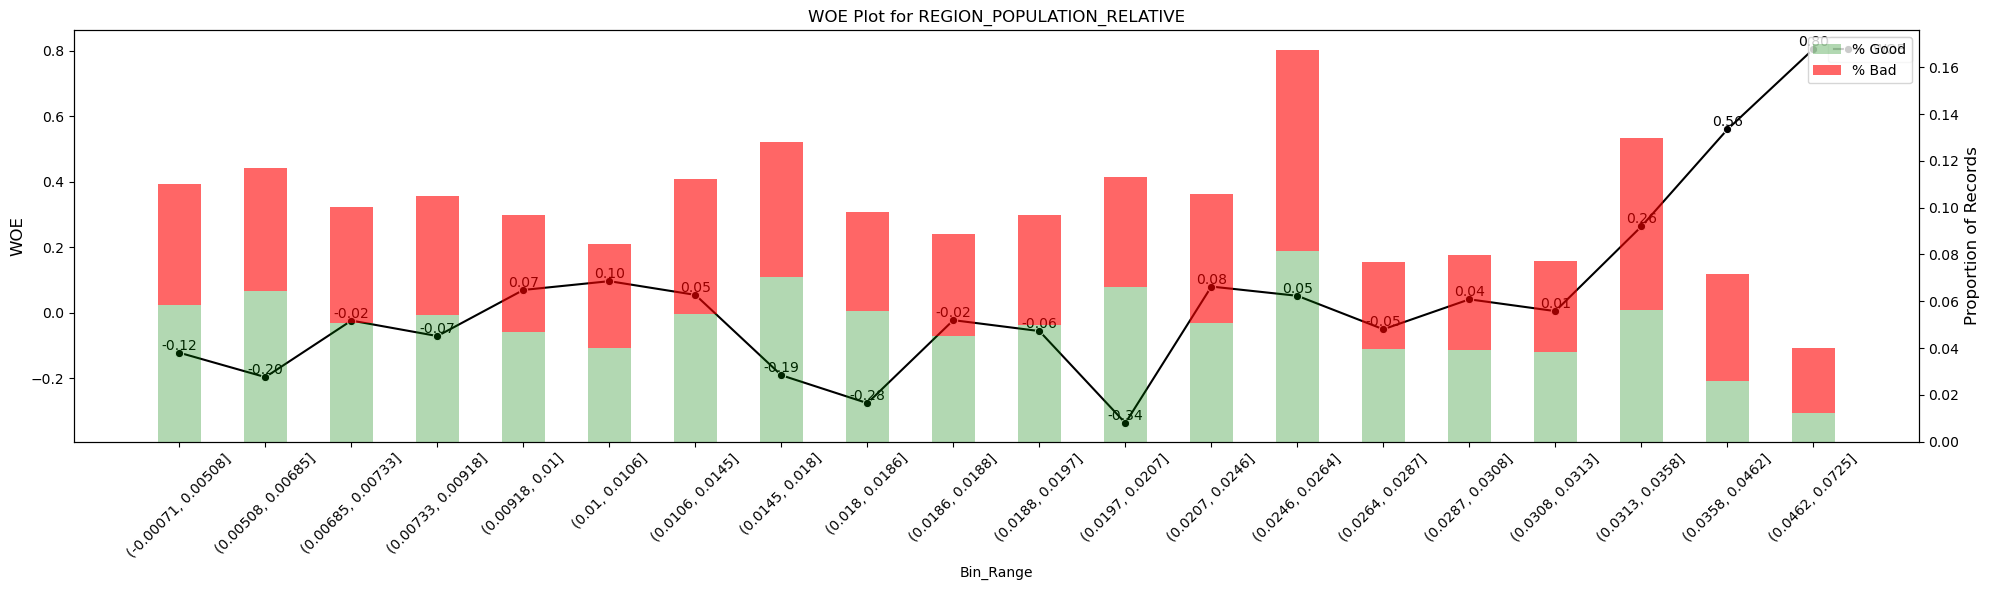


IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0143
WOE values per Bin_Range:
  (-1.001, 0.01]: WOE = -0.089135
  (0.01, 0.05]: WOE = 0.008514
  (0.05, 1.0]: WOE = 0.804657
IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0143


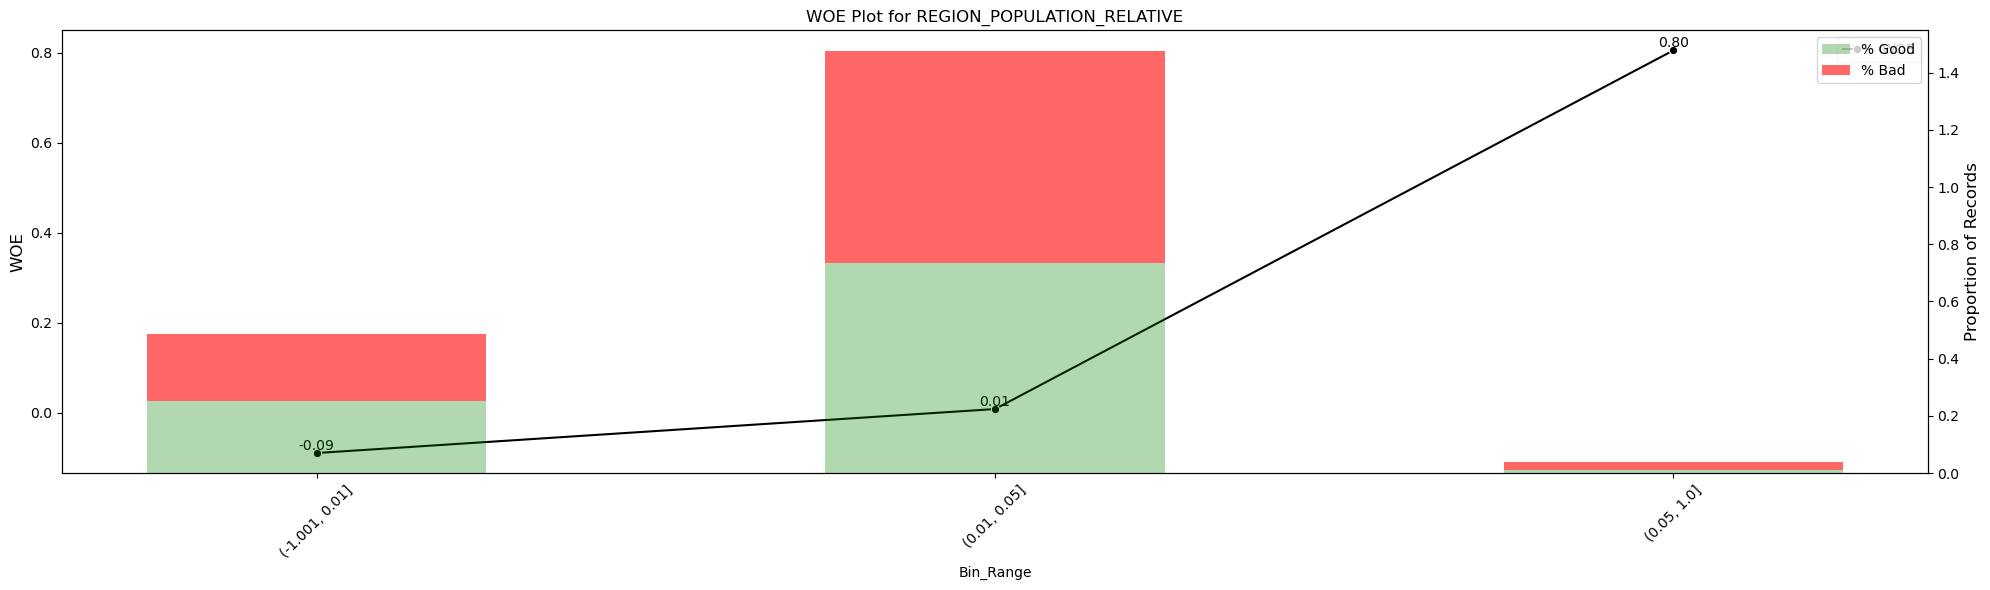

In [234]:
plot_numeric_woe(df, 'REGION_POPULATION_RELATIVE', 20)
plot_numeric_woe_manual(df, 'REGION_POPULATION_RELATIVE', [-1, 0.01, 0.05 ,1])

IV for FLOORSMAX_AVG with 10 bins: 0.04


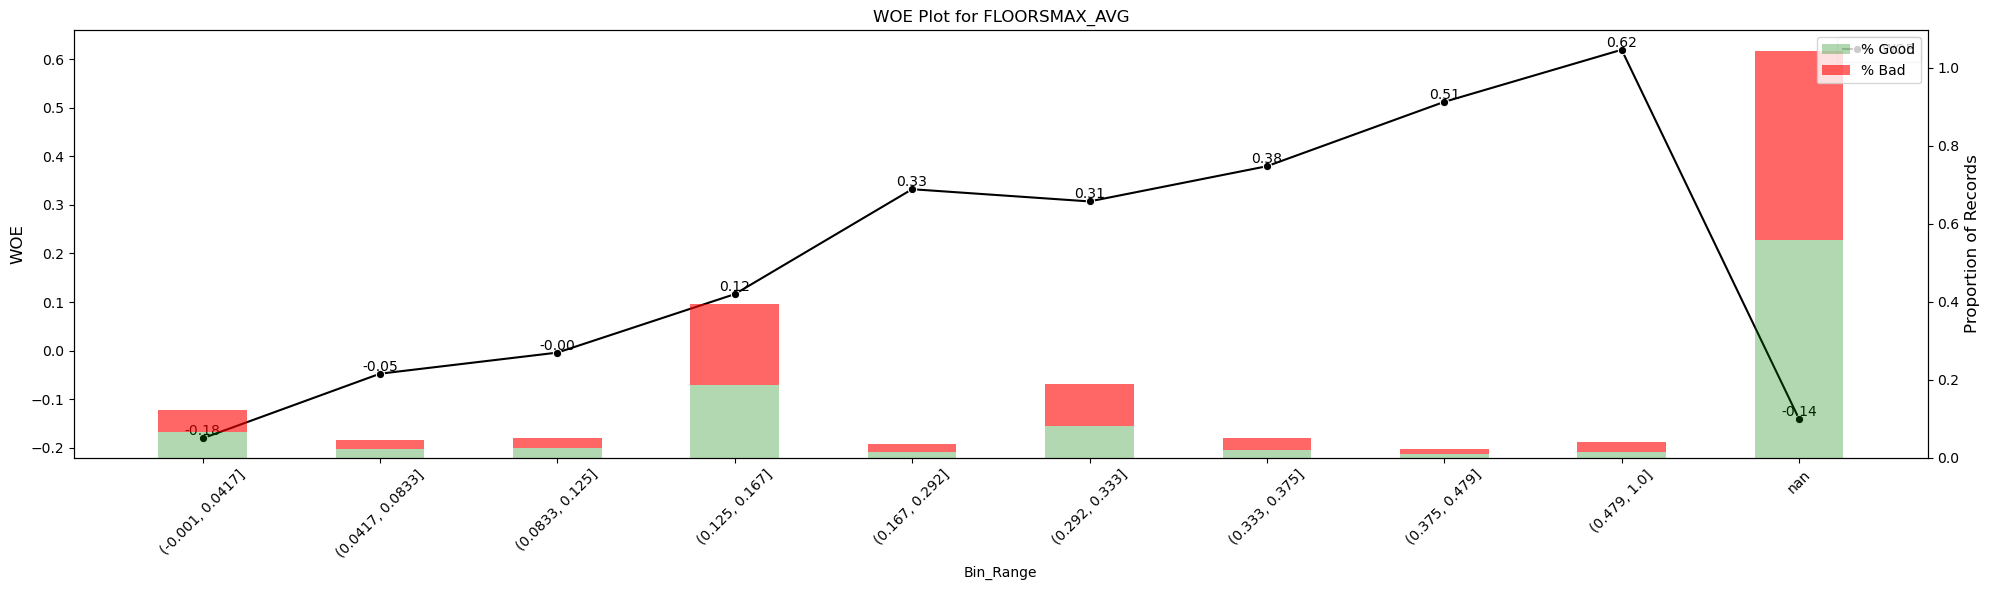


IV for FLOORSMAX_AVG with 4 bins: 0.0367
WOE values per Bin_Range:
  nan: WOE = -0.140397
  (-0.001, 0.15]: WOE = -0.109530
  (0.15, 0.3]: WOE = 0.134812
  (0.3, 1.0]: WOE = 0.374953
IV for FLOORSMAX_AVG with 4 bins: 0.0367


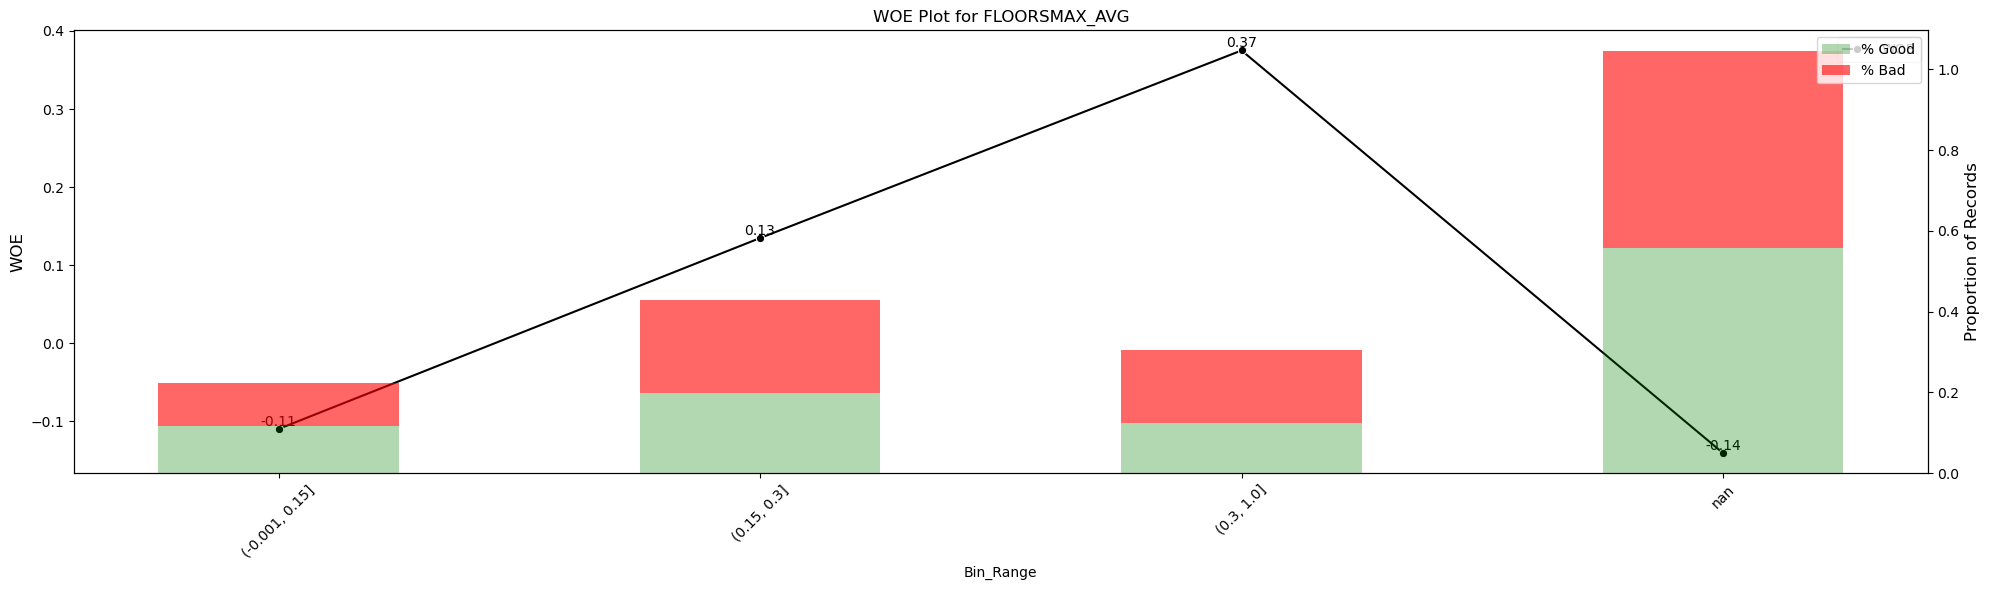

In [235]:
plot_numeric_woe(df, 'FLOORSMAX_AVG', 20)
plot_numeric_woe_manual(df, 'FLOORSMAX_AVG', [0, 0.15, 0.3, 1])

IV for DAYS_ID_PUBLISH with 20 bins: 0.0434


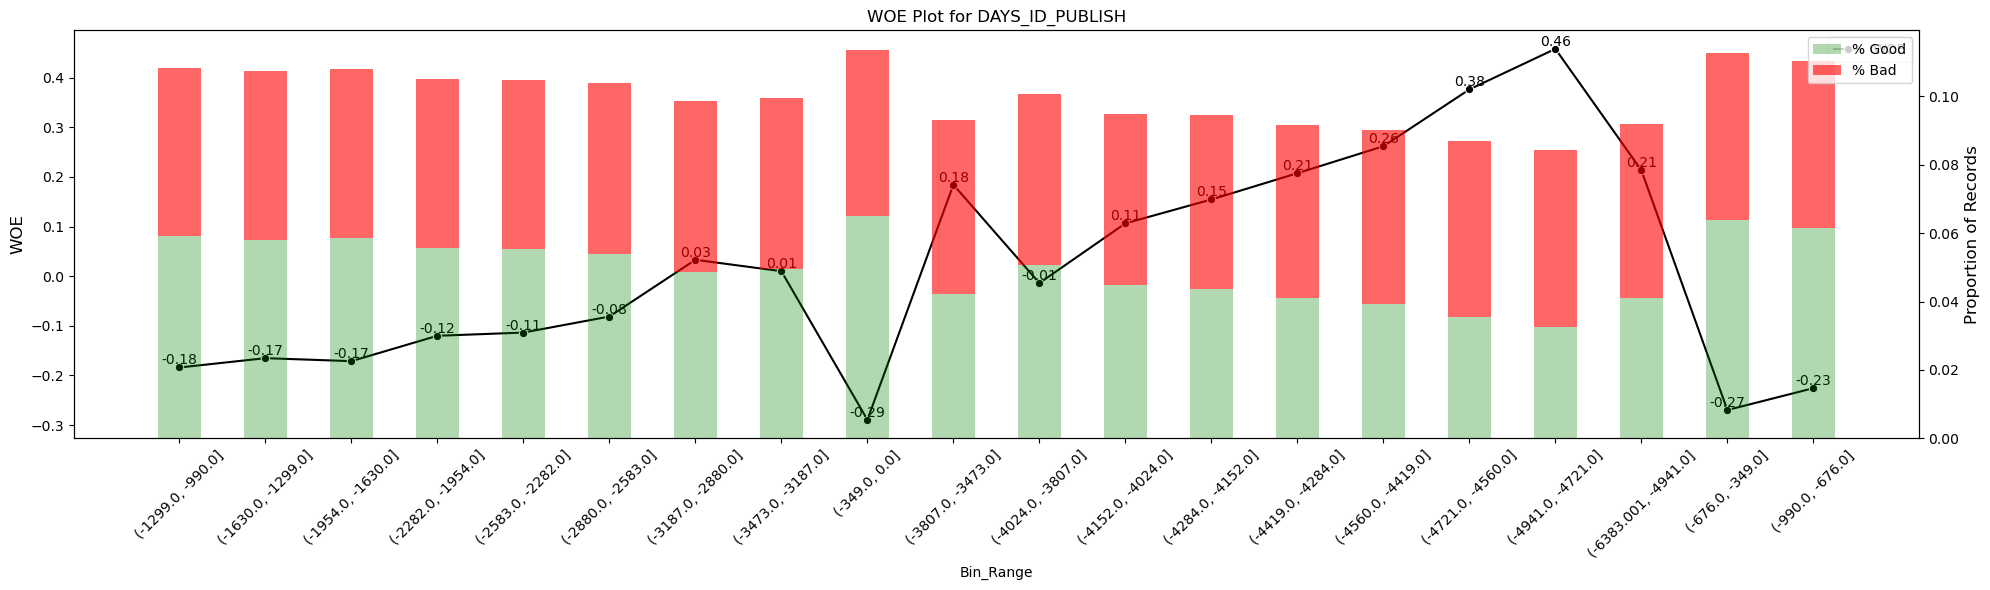


IV for DAYS_ID_PUBLISH with 4 bins: 0.0364
WOE values per Bin_Range:
  (-2000.0, 0.0]: WOE = -0.212013
  (-3000.0, -2000.0]: WOE = -0.100155
  (-4000.0, -3000.0]: WOE = 0.058005
  (-6551.001, -4000.0]: WOE = 0.242266
IV for DAYS_ID_PUBLISH with 4 bins: 0.0364


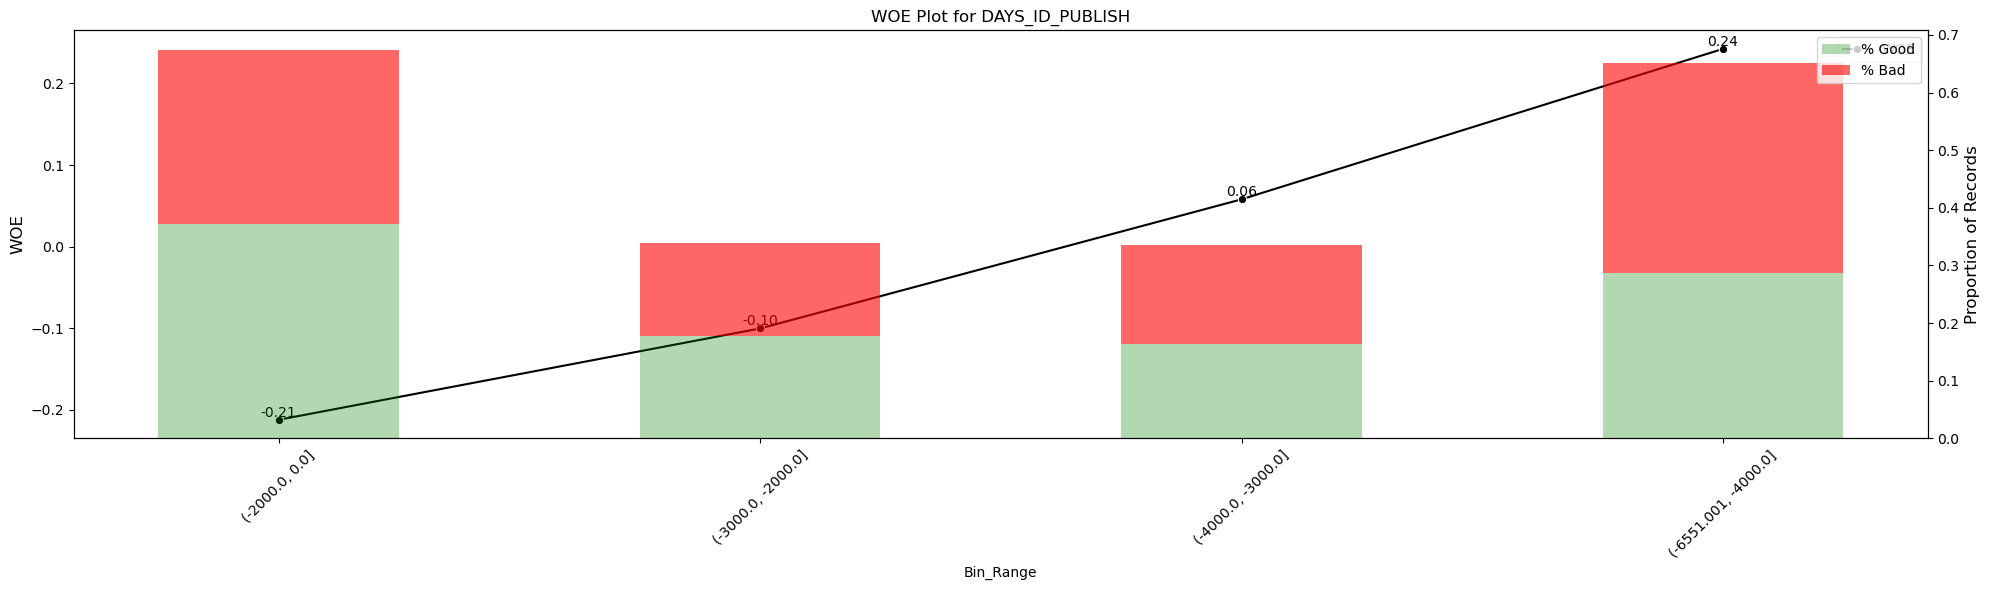

In [236]:
plot_numeric_woe(df, 'DAYS_ID_PUBLISH', 20)
plot_numeric_woe_manual(df, 'DAYS_ID_PUBLISH', [-6551,  -4000, -3000, -2000, 0])

<h1> Create Scorecard

In [237]:
def Encode_WOE_numerical(column, bin_edges, woe_values, output_df, missing_woe_value):
    """
    Encode a numerical column into WOE using manual bins and handle missing values.

    Parameters:
    - column: pandas Series (e.g. original_df['EXT_SOURCE_1'])
    - bin_edges: list of numeric cut points
    - woe_values: WOE values for each bin (len = len(bin_edges) - 1)
    - output_df: DataFrame to which the encoded column will be added
    - missing_woe_value: WOE value to assign to missing values
    """
    col_name = column.name + '_woe'

    # Step 1: Bin the values
    binned = pd.cut(column, bins=bin_edges, include_lowest=True)

    # Step 2: Map each bin to WOE
    bin_labels = binned.cat.categories
    if len(woe_values) != len(bin_labels):
        raise ValueError(f"Number of WOE values ({len(woe_values)}) must match number of bins ({len(bin_labels)})")

    bin_to_woe = {bin_labels[i]: float(woe_values[i]) for i in range(len(woe_values))}

    # Step 3: Map and handle missing values
    encoded_col = binned.map(bin_to_woe).astype(float).fillna(float(missing_woe_value))

    # Step 4: Add to output DataFrame
    output_df[col_name] = encoded_col

In [238]:
def Encode_WOE_categorical(column, bin_ranges, woe_values, output_df, missing_woe_value):
    """
    Encode a categorical column into WOE using manual groupings and handle missing values.
    
    Parameters:
    - column: pandas Series (e.g. original_df['JOB'])
    - bin_ranges: list of grouped category strings (e.g., ['student,unemployed', 'working'])
    - woe_values: WOE values for each group (e.g., [-0.2, 0.4])
    - output_df: DataFrame to which the new column will be added
    - missing_woe_value: WOE value to assign to missing or unmapped values
    """
    col_name = column.name + '_woe'

    # Step 1: Build category-to-WOE mapping
    group_to_woe = {}
    for group_str, woe_val in zip(bin_ranges, woe_values):
        categories = [cat.strip() for cat in group_str.split(',')]
        for cat in categories:
            group_to_woe[cat] = float(woe_val)

    # Step 2: Map values and handle missing/unmapped
    encoded_col = column.fillna('Missing').astype(str).map(group_to_woe).fillna(float(missing_woe_value))

    # Step 3: Add to output DataFrame
    output_df[col_name] = encoded_col

In [240]:
# drop unwatned variables and save new df as after_coarse_classing
cols_to_drop = [
    'REGION_POPULATION_RELATIVE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_CREDIT_ENDDATE_mean'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df1.drop(columns=[col for col in cols_to_drop if col in df1.columns], inplace=True)
df.info()
df.to_csv('after_coarse_classing_train.csv', index=False)
df1.to_csv('after_coarse_classing_test.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    145110 non-null  int64  
 1   NAME_INCOME_TYPE          145110 non-null  object 
 2   NAME_EDUCATION_TYPE       145110 non-null  object 
 3   DAYS_ID_PUBLISH           145110 non-null  int64  
 4   OCCUPATION_TYPE           100272 non-null  object 
 5   ORGANIZATION_TYPE         145110 non-null  object 
 6   EXT_SOURCE_1              62444 non-null   float64
 7   FLOORSMAX_AVG             73800 non-null   float64
 8   RATIO_LIFE_EMPLOYED       145110 non-null  float64
 9   LOAN_TO_VALUE             144951 non-null  float64
 10  DAYS_CREDIT_min           123772 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   123772 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  120353 non-null  float64
 13  CREDIT_ACTIVE_Active      123772 non-null  f

In [241]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62190 entries, 0 to 62189
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARGET                    62190 non-null  int64  
 1   NAME_INCOME_TYPE          62190 non-null  object 
 2   NAME_EDUCATION_TYPE       62190 non-null  object 
 3   DAYS_ID_PUBLISH           62190 non-null  int64  
 4   OCCUPATION_TYPE           42839 non-null  object 
 5   ORGANIZATION_TYPE         62190 non-null  object 
 6   EXT_SOURCE_1              26824 non-null  float64
 7   FLOORSMAX_AVG             31536 non-null  float64
 8   RATIO_LIFE_EMPLOYED       62190 non-null  float64
 9   LOAN_TO_VALUE             62126 non-null  float64
 10  DAYS_CREDIT_min           53080 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   53080 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  51657 non-null  float64
 13  CREDIT_ACTIVE_Active      53080 non-null  float64
dtypes: flo

In [243]:
encoded_df = pd.DataFrame()
encoded_df1 = pd.DataFrame()
df = pd.read_csv('after_coarse_classing_train.csv')
df1 = pd.read_csv('after_coarse_classing_test.csv')
df.info()
encoded_df['TARGET'] = df['TARGET']
encoded_df1['TARGET'] = df1['TARGET']
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    145110 non-null  int64  
 1   NAME_INCOME_TYPE          145110 non-null  object 
 2   NAME_EDUCATION_TYPE       145110 non-null  object 
 3   DAYS_ID_PUBLISH           145110 non-null  int64  
 4   OCCUPATION_TYPE           100272 non-null  object 
 5   ORGANIZATION_TYPE         145110 non-null  object 
 6   EXT_SOURCE_1              62444 non-null   float64
 7   FLOORSMAX_AVG             73800 non-null   float64
 8   RATIO_LIFE_EMPLOYED       145110 non-null  float64
 9   LOAN_TO_VALUE             144951 non-null  float64
 10  DAYS_CREDIT_min           123772 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum   123772 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean  120353 non-null  float64
 13  CREDIT_ACTIVE_Active      123772 non-null  f

In [244]:
Encode_WOE_categorical(
    df['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df1,
    missing_woe_value=0.0
)


In [246]:
Encode_WOE_categorical(
    df['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
print(encoded_df.head(10))
print(encoded_df1.head(10))

   TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe
0       1             -0.174844                -0.109445
1       0             -0.174844                -0.109445
2       0             -0.174844                -0.109445
3       0              0.389268                -0.109445
4       0              0.389268                 0.430333
5       0              0.389268                -0.109445
6       0             -0.174844                -0.109445
7       0              0.389268                -0.109445
8       0             -0.174844                -0.109445
9       0             -0.174844                -0.109445
   TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe
0       0             -0.174844                -0.109445
1       0              0.068848                 0.430333
2       0             -0.174844                 0.430333
3       0             -0.174844                -0.109445
4       0             -0.174844                -0.109445
5       0             -0.174844

In [247]:
Encode_WOE_numerical(
    df['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
Encode_WOE_numerical(
    df1['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(50)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe
0        1             -0.174844                -0.109445            -0.091631
1        0             -0.174844                -0.109445            -0.091631
2        0             -0.174844                -0.109445            -0.091631
3        0              0.389268                -0.109445            -0.200515
4        0              0.389268                 0.430333            -0.091631
5        0              0.389268                -0.109445             0.038013
6        0             -0.174844                -0.109445             0.038013
7        0              0.389268                -0.109445            -0.091631
8        0             -0.174844                -0.109445            -0.091631
9        0             -0.174844                -0.109445            -0.200515
10       0              0.389268                 0.430333             0.038013
11       0             -0.174844                -0.109445            -0.200515
12       0              0.068848                -0.109445            -0.091631
13       0             -0.174844                -0.109445            -0.091631
14       0              0.389268                 0.430333            -0.091631
15       0              0.068848                -0.109445             0.038013
16       0             -0.174844                -0.109445            -0.091631
17       0              0.389268                 0.430333             0.231393
18       0              0.068848                -0.109445            -0.200515
19       0             -0.174844                -0.109445             0.231393
20       0             -0.174844                 0.430333             0.231393
21       0             -0.174844                -0.109445            -0.200515
22       0              0.389268                 0.430333             0.231393
23       0             -0.174844                -0.109445            -0.200515
24       0             -0.174844                -0.109445             0.038013
25       0             -0.174844                -0.109445            -0.200515
26       0              0.389268                 0.430333            -0.091631
27       0              0.068848                 0.430333            -0.200515
28       0             -0.174844                 0.430333             0.231393
29       0             -0.174844                -0.109445            -0.200515
30       0             -0.174844                -0.109445             0.231393
31       0             -0.174844                 0.430333            -0.200515
32       0              0.068848                -0.109445            -0.091631
33       0              0.389268                 0.430333             0.038013
34       0              0.389268                 0.430333             0.038013
35       0             -0.174844                -0.109445            -0.091631
36       0             -0.174844                -0.109445             0.231393
37       0             -0.174844                -0.109445            -0.200515
38       0              0.068848                 0.430333             0.231393
39       0             -0.174844                -0.109445            -0.200515
40       0             -0.174844                -0.109445            -0.091631
41       0             -0.174844                -0.109445            -0.200515
42       0             -0.174844                -0.109445            -0.091631
43       0              0.389268                -0.109445            -0.200515
44       0             -0.174844                 0.430333             0.231393
45       0              0.389268                 0.430333            -0.200515
46       0             -0.174844                -0.109445            -0.091631
47       0             -0.174844                -0.109445            -0.200515
48       0              0.068848                -0.109445            -0.091631
49       1              0.068848                -0.109

In [248]:
Encode_WOE_categorical(
    df['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe
0       1             -0.174844                -0.109445            -0.091631            -0.327910
1       0             -0.174844                -0.109445            -0.091631            -0.327910
2       0             -0.174844                -0.109445            -0.091631            -0.327910
3       0              0.389268                -0.109445            -0.200515            -0.327910
4       0              0.389268                 0.430333            -0.091631             0.295461
5       0              0.389268                -0.109445             0.038013             0.207703
6       0             -0.174844                -0.109445             0.038013            -0.327910
7       0              0.389268                -0.109445            -0.091631             0.207703
8       0             -0.174844                -0.109445            -0.091631            -0.327910
9       0             -0.174844                -0.109445            -0.200515            -0.327910

In [249]:
Encode_WOE_numerical(
    df['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
Encode_WOE_numerical(
    df1['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe
0       1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106
1       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502
2       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502
3       0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502
4       0              0.389268                 0.430333            -0.091631             0.295461         -0.066502
5       0              0.389268                -0.109445             0.038013             0.207703          0.220194
6       0             -0.174844                -0.109445             0.038013            -0.327910         -0.066502
7       0              0.389268                -0.109445            -0.091631             0.207703          0.715798
8       0             -0.174844                -0.109445            -0.091631            -0.327910          0.715798
9       0             -0.174844                -0.109445            -0.200515            -0.327910         -0.066502

In [250]:
Encode_WOE_numerical(
    df['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df,
    missing_woe_value= -0.139012
)
Encode_WOE_numerical(
    df1['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df1,
    missing_woe_value= -0.139012
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe
0       1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243
1       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012
2       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012
3       0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012
4       0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012

In [251]:
Encode_WOE_numerical(
    df['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df,
    missing_woe_value=0.475725
)
Encode_WOE_numerical(
    df1['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df1,
    missing_woe_value=0.475725
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe
0       1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114
1       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114
2       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307
3       0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114
4       0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114

In [252]:
Encode_WOE_numerical(
    df['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df,
    missing_woe_value= 0.064642
)
Encode_WOE_numerical(
    df1['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df1,
    missing_woe_value= 0.064642
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe
0       1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114          -0.101539
1       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114           0.219235
2       0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307          -0.101539
3       0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114          -0.101539
4       0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114           0.219235

In [253]:
Encode_WOE_numerical(
    df['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df,
    missing_woe_value= -0.259792
)
Encode_WOE_numerical(
    df1['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df1,
    missing_woe_value= -0.259792
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  DAYS_CREDIT_min_woe
0        1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114          -0.101539            -0.025217
1        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114           0.219235            -0.025217
2        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307          -0.101539            -0.259792
3        0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114          -0.101539            -0.025217
4        0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114           0.219235             0.346265
5        0              0.389268                -0.109445             0.038013             0.207703          0.220194          -0.139012                 0.391251          -0.101539             0.346265
6        0             -0.174844                -0.109445             0.038013            -0.327910         -0.066502          -0.139012                -0.043307           0.219235            -0.259792
7        0              0.389268                -0.109445            -0.091631             0.207703          0.715798          -0.139012                 0.391251          -0.101539            -0.025217
8        0             -0.174844                -0.109445            -0.091631            -0.327910          0.715798           0.362640                -0.292114          -0.101539            -0.259792
9        0             -0.174844                -0.109445            -0.200515            -0.327910         -0.066502          -0.111243                 0.475725           0.219235            -0.285150
10       0              0.389268                 0.430333             0.038013             0.295461         -0.066502          -0.139012                -0.043307          -0.101539             0.346265
11       0             -0.174844                -0.109445            -0.200515            -0.327910          0.220194           0.140623                 0.220441           0.219235            -0.259792
12       0              0.068848                -0.109445            -0.091631            -0.198608          0.220194          -0.139012                -0.043307          -0.101539            -0.285150
13       0             -0.174844                -0.109445            -0.091631            -0.198608          0.220194           0.140623                -0.043307           0.219235             0.186869
14       0              0.389268                 0.430333            -0.091631             0.207703          0.715798          -0.139012                -0.043307          -0.101539            -0.259792
15       0              0.068848                -0.109445             0.038013             0.207703         -0.066502          -0.111243                -0.043307          -0.101539             0.346265
16       0             -0.174844                -0.109445            -0.091631             0.207703         -0.286090           0.362640                -0.292114          -0.101539            -0.285150
17       0              0.389268                 0.430333             0.231393             0.295461         -0.066502           0.140623                 0.220441           0.219235            -0.259792
18       0              0.068848                -0.109445            -0.200515             0.207703          1.255758          -0.139012                -0.292114     

In [254]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df,
    missing_woe_value= -0.181634
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df1,
    missing_woe_value= -0.181634
)
encoded_df.head(20)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  DAYS_CREDIT_min_woe  AMT_CREDIT_SUM_DEBT_sum_woe
0        1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114          -0.101539            -0.025217                    -0.000157
1        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114           0.219235            -0.025217                     0.378028
2        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307          -0.101539            -0.259792                    -0.181634
3        0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114          -0.101539            -0.025217                    -0.000157
4        0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114           0.219235             0.346265                    -0.120005
5        0              0.389268                -0.109445             0.038013             0.207703          0.220194          -0.139012                 0.391251          -0.101539             0.346265                     0.378028
6        0             -0.174844                -0.109445             0.038013            -0.327910         -0.066502          -0.139012                -0.043307           0.219235            -0.259792                    -0.181634
7        0              0.389268                -0.109445            -0.091631             0.207703          0.715798          -0.139012                 0.391251          -0.101539            -0.025217                     0.378028
8        0             -0.174844                -0.109445            -0.091631            -0.327910          0.715798           0.362640                -0.292114          -0.101539            -0.259792                    -0.181634
9        0             -0.174844                -0.109445            -0.200515            -0.327910         -0.066502          -0.111243                 0.475725           0.219235            -0.285150                    -0.000157
10       0              0.389268                 0.430333             0.038013             0.295461         -0.066502          -0.139012                -0.043307          -0.101539             0.346265                    -0.000157
11       0             -0.174844                -0.109445            -0.200515            -0.327910          0.220194           0.140623                 0.220441           0.219235            -0.259792                    -0.181634
12       0              0.068848                -0.109445            -0.091631            -0.198608          0.220194          -0.139012                -0.043307          -0.101539            -0.285150                    -0.181634
13       0             -0.174844                -0.109445            -0.091631            -0.198608          0.220194           0.140623                -0.043307           0.219235             0.186869                    -0.120005
14       0              0.389268                 0.430333            -0.091631             0.207703          0.715798          -0.139012                -0.043307          -0.101539            -0.259792                     0.378028
15       0              0.068848                -0.109445             0.038013             0.207703         -0.066502          -0.111243                -0.043307          -0.101539             0.346265                    -0.181634
16       0             -0.174844                -0.109445            -0.09163

In [255]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df,
    missing_woe_value= -0.167258
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df1,
    missing_woe_value= -0.167258
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  DAYS_CREDIT_min_woe  AMT_CREDIT_SUM_DEBT_sum_woe  AMT_CREDIT_SUM_DEBT_mean_woe
0        1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114          -0.101539            -0.025217                    -0.000157                     -0.016294
1        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114           0.219235            -0.025217                     0.378028                      0.393519
2        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307          -0.101539            -0.259792                    -0.181634                     -0.167258
3        0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114          -0.101539            -0.025217                    -0.000157                     -0.016294
4        0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114           0.219235             0.346265                    -0.120005                     -0.167258
5        0              0.389268                -0.109445             0.038013             0.207703          0.220194          -0.139012                 0.391251          -0.101539             0.346265                     0.378028                      0.393519
6        0             -0.174844                -0.109445             0.038013            -0.327910         -0.066502          -0.139012                -0.043307           0.219235            -0.259792                    -0.181634                     -0.167258
7        0              0.389268                -0.109445            -0.091631             0.207703          0.715798          -0.139012                 0.391251          -0.101539            -0.025217                     0.378028                      0.393519
8        0             -0.174844                -0.109445            -0.091631            -0.327910          0.715798           0.362640                -0.292114          -0.101539            -0.259792                    -0.181634                     -0.167258
9        0             -0.174844                -0.109445            -0.200515            -0.327910         -0.066502          -0.111243                 0.475725           0.219235            -0.285150                    -0.000157                     -0.167258
10       0              0.389268                 0.430333             0.038013             0.295461         -0.066502          -0.139012                -0.043307          -0.101539             0.346265                    -0.000157                     -0.016294
11       0             -0.174844                -0.109445            -0.200515            -0.327910          0.220194           0.140623                 0.220441           0.219235            -0.259792                    -0.181634                     -0.167258
12       0              0.068848                -0.109445            -0.091631            -0.198608          0.220194          -0.139012                -0.043307          -0.101539            -0.285150                    -0.181634                     -0.167258
13       0             -0.174844                -0.109445            -0.091631            -0.198608          0.220194           0.140623                -0.043307           0.219235             0.186869                    -0.120005                     -0.016294
14       0              0.389268                 0.430333            -0.091631           

In [256]:
Encode_WOE_numerical(
    df['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df,
    missing_woe_value= -0.244067
)
Encode_WOE_numerical(
    df1['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df1,
    missing_woe_value= -0.244067
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  DAYS_CREDIT_min_woe  AMT_CREDIT_SUM_DEBT_sum_woe  AMT_CREDIT_SUM_DEBT_mean_woe  CREDIT_ACTIVE_Active_woe
0        1             -0.174844                -0.109445            -0.091631            -0.327910         -0.944106          -0.111243                -0.292114          -0.101539            -0.025217                    -0.000157                     -0.016294                  0.051390
1        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.292114           0.219235            -0.025217                     0.378028                      0.393519                  0.227726
2        0             -0.174844                -0.109445            -0.091631            -0.327910         -0.066502          -0.139012                -0.043307          -0.101539            -0.259792                    -0.181634                     -0.167258                 -0.244067
3        0              0.389268                -0.109445            -0.200515            -0.327910         -0.066502          -0.139012                -0.292114          -0.101539            -0.025217                    -0.000157                     -0.016294                  0.227726
4        0              0.389268                 0.430333            -0.091631             0.295461         -0.066502          -0.139012                -0.292114           0.219235             0.346265                    -0.120005                     -0.167258                  0.227726
5        0              0.389268                -0.109445             0.038013             0.207703          0.220194          -0.139012                 0.391251          -0.101539             0.346265                     0.378028                      0.393519                  0.227726
6        0             -0.174844                -0.109445             0.038013            -0.327910         -0.066502          -0.139012                -0.043307           0.219235            -0.259792                    -0.181634                     -0.167258                 -0.244067
7        0              0.389268                -0.109445            -0.091631             0.207703          0.715798          -0.139012                 0.391251          -0.101539            -0.025217                     0.378028                      0.393519                  0.227726
8        0             -0.174844                -0.109445            -0.091631            -0.327910          0.715798           0.362640                -0.292114          -0.101539            -0.259792                    -0.181634                     -0.167258                 -0.244067
9        0             -0.174844                -0.109445            -0.200515            -0.327910         -0.066502          -0.111243                 0.475725           0.219235            -0.285150                    -0.000157                     -0.167258                  0.051390
10       0              0.389268                 0.430333             0.038013             0.295461         -0.066502          -0.139012                -0.043307          -0.101539             0.346265                    -0.000157                     -0.016294                 -0.322140
11       0             -0.174844                -0.109445            -0.200515            -0.327910          0.220194           0.140623                 0.220441           0.219235            -0.259792                    -0.181634                     -0.167258                 -0.244067
12       0              0.068848                -0.109445            -0.091631            -0.198608          0.220194          -0.139012                -0.043307          -0.101539            -0.285150                    -0.181634                     -0.167258             

In [257]:
encoded_df.info()
encoded_df.to_csv('woe_encoded_df_train.csv', index=False)
encoded_df1.to_csv('woe_encoded_df_test.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        145110 non-null  int64  
 1   NAME_INCOME_TYPE_woe          145110 non-null  float64
 2   NAME_EDUCATION_TYPE_woe       145110 non-null  float64
 3   DAYS_ID_PUBLISH_woe           145110 non-null  float64
 4   OCCUPATION_TYPE_woe           145110 non-null  float64
 5   EXT_SOURCE_1_woe              145110 non-null  float64
 6   FLOORSMAX_AVG_woe             145110 non-null  float64
 7   RATIO_LIFE_EMPLOYED_woe       145110 non-null  float64
 8   LOAN_TO_VALUE_woe             145110 non-null  float64
 9   DAYS_CREDIT_min_woe           145110 non-null  float64
 10  AMT_CREDIT_SUM_DEBT_sum_woe   145110 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_mean_woe  145110 non-null  float64
 12  CREDIT_ACTIVE_Active_woe      145110 non-nul

## logistic regression

In [3]:
train_woe = pd.read_csv('woe_encoded_df_train.csv')
test_woe = pd.read_csv('woe_encoded_df_test.csv')


In [5]:
# sample code

# create the X, y parts of data for train and test
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

# create a logistic regression model object
lr = LogisticRegression(solver='liblinear',class_weight='balanced') # unequal number of goods and bads
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                      -0.003206
NAME_INCOME_TYPE_woe           -0.203943
NAME_EDUCATION_TYPE_woe        -0.682195
DAYS_ID_PUBLISH_woe            -0.508301
OCCUPATION_TYPE_woe            -0.383357
EXT_SOURCE_1_woe               -0.812820
FLOORSMAX_AVG_woe              -0.697322
RATIO_LIFE_EMPLOYED_woe        -0.633873
LOAN_TO_VALUE_woe              -0.962751
DAYS_CREDIT_min_woe            -0.527693
AMT_CREDIT_SUM_DEBT_sum_woe    -0.235553
AMT_CREDIT_SUM_DEBT_mean_woe   -0.235992
CREDIT_ACTIVE_Active_woe       -0.768703
dtype: float64

In [7]:
bins = {'NAME_INCOME_TYPE_woe':['Missing','Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
        'NAME_EDUCATION_TYPE_woe':['Missing','Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
        'DAYS_ID_PUBLISH_woe':['Missing',-10000,-4000,-3000,-2000, 0],
        'OCCUPATION_TYPE_woe':['Missing','Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
        'ORGANIZATION_TYPE_woe':['Missing','Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
        'EXT_SOURCE_1_woe':['Missing',-1, 0.2, 0.4, 0.6, 0.8, 1],
        'FLOORSMAX_AVG_woe':['Missing',-1, 0.15,0.3,1],
        'RATIO_LIFE_EMPLOYED_woe':['Missing',-50000, 0, 0.1, 0.2, 0.3],
        'LOAN_TO_VALUE_woe':['Missing',0, 1, 6],
        'DAYS_CREDIT_min_woe':['Missing',-2900,-2500,-1500, -1000, -200],
        'AMT_CREDIT_SUM_DEBT_sum_woe':['Missing',-70000001, 0, 300000.0, 1200000.0],
        'AMT_CREDIT_SUM_DEBT_mean_woe':['Missing',-2000001, 2000.0, 120000.0],
        'CREDIT_ACTIVE_Active_woe':['Missing',-1, 1, 3, 32],
        
        }
woe_values = {
        'NAME_INCOME_TYPE_woe':[0.0,-0.174844, 0.068848, 0.389268],
        'NAME_EDUCATION_TYPE_woe':[0.0,-0.109445, 0.430333],
        'DAYS_ID_PUBLISH_woe':[-0.066502,0.231393, 0.038013, -0.091631, -0.200515],
        'OCCUPATION_TYPE_woe':[0.0,-0.327910, -0.198608, 0.207703, 0.295461],
        'ORGANIZATION_TYPE_woe':[0.0,-0.277191, -0.154363, 0.101947, 0.410070],
        'EXT_SOURCE_1_woe':[-0.066502,-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
        'FLOORSMAX_AVG_woe':[-0.139012,-0.111243,0.140623,0.362640],
        'RATIO_LIFE_EMPLOYED_woe':[0.475725,0.391251, -0.292114, -0.043307, 0.220441],
        'LOAN_TO_VALUE_woe':[0.064642,0.219235,-0.101539],
        'DAYS_CREDIT_min_woe':[-0.259792,0.346265, 0.186869, -0.025217, -0.285150],
        'AMT_CREDIT_SUM_DEBT_sum_woe':[-0.181634,0.378028, -0.000157, -0.120005],
        'AMT_CREDIT_SUM_DEBT_mean_woe':[-0.167258,0.393519, -0.016294],
        'CREDIT_ACTIVE_Active_woe':[-0.244067,0.227726, 0.051390, -0.322140],
}


### Score points

In [8]:
# lr.coef_[0]
cols = list(train_woe.columns[train_woe.columns!='TARGET'])
coefficients = lr.coef_[0]
coefficient_map = dict(zip(cols, coefficients))
print(coefficient_map)


{'NAME_INCOME_TYPE_woe': -0.20394334026034514, 'NAME_EDUCATION_TYPE_woe': -0.6821951490450935, 'DAYS_ID_PUBLISH_woe': -0.50830063893285, 'OCCUPATION_TYPE_woe': -0.3833570725208578, 'EXT_SOURCE_1_woe': -0.8128203287487734, 'FLOORSMAX_AVG_woe': -0.6973220555209074, 'RATIO_LIFE_EMPLOYED_woe': -0.6338725152018106, 'LOAN_TO_VALUE_woe': -0.9627507032403868, 'DAYS_CREDIT_min_woe': -0.527692940995975, 'AMT_CREDIT_SUM_DEBT_sum_woe': -0.23555261163942418, 'AMT_CREDIT_SUM_DEBT_mean_woe': -0.23599204366440574, 'CREDIT_ACTIVE_Active_woe': -0.7687031980650246}


In [9]:
# score = -(coef * woe encoded values + intercept / n )
def calculate_score(coef,woe,intercept,n,bins,variable_name):
    PDO = 20
    POINTS0= 600
    ODDS0 = 1/20 
    scores = []
    scaled_scores = []
    for i in range (len(woe)):
        score = -(coef*woe[i]+intercept/n)
        factor = PDO/np.log(2)
        offset = POINTS0 - factor * np.log(ODDS0)
        scaled_score = score * (factor) + offset/n
        scaled_scores.append(scaled_score)
        scores.append(score)
   
    if not (len(scores) == len(woe) ):
        raise ValueError("The lengths of scores, woe, and bins lists must be equal.")
    


    score_data = []
    for i in range(len(scores)):
        if(len(scores))+1 == len(bins):
            if(bins[i] == 'Missing'):
                label =  f"[{bins[i]}]"
            else:
                label =  f"[{bins[i]},{bins[i+1]}]" 
        else:
            label =  f"[{bins[i]}]"
        score_data.append({
            'variable': variable_name,
            'bin': label,
            'woe': woe[i],
            'score': scores[i],
            'scaled_score': scaled_scores[i],
        })

    return pd.DataFrame(score_data)



# Example Usage:
scores_example = [-0.014784649240414687, 0.006162486929158133, 0.03370496420151226]
woe_example = [-0.174844, 0.068848, 0.389268]
bins_example = ['Maternity leave, Unemployed, Working', 'Commercial associate', 'State servant, Pensioner, Businessman, Student']
variable_name_example = "OCCUPATION_TYPE"  # Replace with the actual variable name

scorecard_table = calculate_score(coef=coefficients[0],woe = woe_example, intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins_example, variable_name=variable_name_example)

print(scorecard_table)

          variable                                               bin  \
0  OCCUPATION_TYPE            [Maternity leave, Unemployed, Working]   
1  OCCUPATION_TYPE                            [Commercial associate]   
2  OCCUPATION_TYPE  [State servant, Pensioner, Businessman, Student]   

        woe     score  scaled_score  
0 -0.174844 -0.035391     56.182042  
1  0.068848  0.014308     57.616063  
2  0.389268  0.079656     59.501594  


In [10]:
for col in coefficient_map.keys():
    if col in bins:
        scorecard_table = calculate_score(coef=coefficient_map[col],woe = woe_values[col], intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins[col], variable_name=col)
        print(scorecard_table)
    else:
        print(f"Column {col} not found in bins dictionary.")

               variable                                               bin  \
0  NAME_INCOME_TYPE_woe                                         [Missing]   
1  NAME_INCOME_TYPE_woe            [Maternity leave, Unemployed, Working]   
2  NAME_INCOME_TYPE_woe                            [Commercial associate]   
3  NAME_INCOME_TYPE_woe  [State servant, Pensioner, Businessman, Student]   

        woe     score  scaled_score  
0  0.000000  0.000267     57.210923  
1 -0.174844 -0.035391     56.182042  
2  0.068848  0.014308     57.616063  
3  0.389268  0.079656     59.501594  
                  variable                                                bin  \
0  NAME_EDUCATION_TYPE_woe                                          [Missing]   
1  NAME_EDUCATION_TYPE_woe  [Lower secondary,Secondary / secondary special...   
2  NAME_EDUCATION_TYPE_woe                 [Higher education,Academic degree]   

        woe     score  scaled_score  
0  0.000000  0.000267     57.210923  
1 -0.109445 -0.074396  

In [ ]:
cutoff=600


# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(classification_report(y_train, predicted_bad_train_list))

print('*** Test Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(classification_report(y_test, predicted_bad_test_list))


In [97]:
# PROPER WAY
# y_train = woe_train_df.loc[:, 'TARGET']
# X_train = woe_train_df.loc[:, woe_train_df.columns != 'TARGET']
# y_test = woe_test_df.loc[:, 'TARGET']
# X_test = woe_test_df.loc[:, woe_train_df.columns != 'TARGET']

# # create a logistic regression model object
# lr = LogisticRegression(solver='liblinear',class_weight='balanced') # unequal number of goods and bads
# lr.fit(X_train, y_train)
# pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
#           index = np.concatenate([['intercept'], lr.feature_names_in_]) )

<h1> Analysis And Tuning

<h4>What happens if we do not drop the variables with low monatonic trend?